# Figures of the paper "Characterization of internal tides in a realistic simulation"

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from scipy import fft
import seaborn as sns
import pandas as pd

import matplotlib as mpl
mpl.rcParams["font.size"]=15

In [2]:
# definition of root paths
root_dir = '/Users/zcaspar/codes/mit4320/'
fig_dir = '/Users/zcaspar/Documents/Figures_paper2/'

In [4]:
_ = pd.read_parquet(root_dir+'Lagrangian_datamean_152W40N')

In [9]:
import os as os

In [25]:
_ = [filename for filename in os.listdir(root_dir) if filename.startswith('Lagrangian_datamean_')]

In [21]:
__

'Lagrangian_data_east_Pac'

In [26]:
for __ in _ :
    test = pd.read_parquet(root_dir+__)
    print(test.lat.max())

10.99992795329646
40.999612546033305
35.9999459510952
-7.000142935827286


OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 43840-10-24 00:00:00

<AxesSubplot:xlabel='lon', ylabel='lat'>

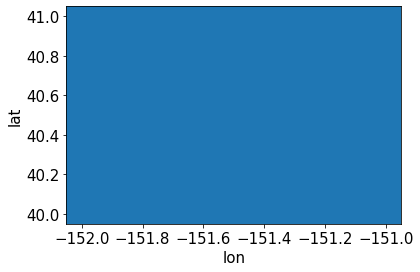

In [8]:
_.plot.scatter('lon','lat',s='trajectory')

### Figure 2 :

In [3]:
#Load extracted local data (here polynesia)
ds = xr.open_dataset(root_dir+'Eulerian_data_polynesia.nc')
#ds = xr.open_dataset(root_dir+'local_distribution_Atl.nc')

#dsL_demod = pd.read_parquet(root_dir+'Lagrangian_data_polynesia')
#dsL = pd.read_parquet(root_dir+'Lagrangian_datamean_149W8S')


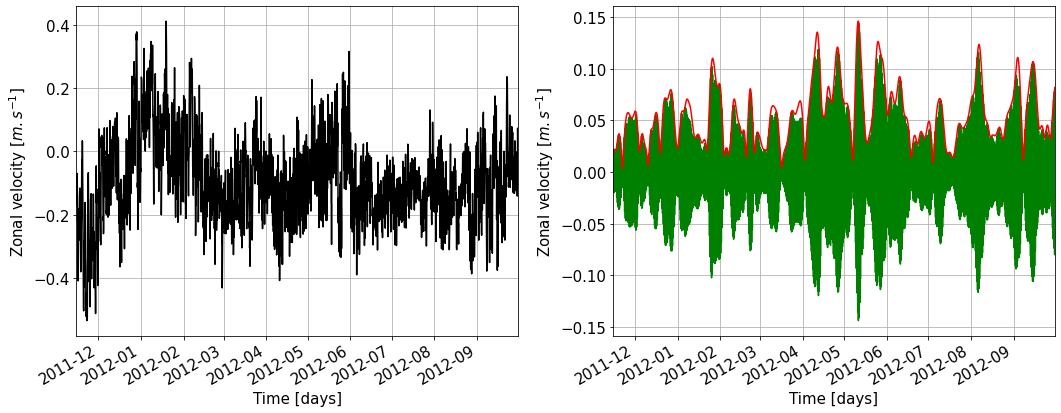

In [55]:
#Selection of one grid point and plot of velocity time series:

fig,axs = plt.subplots(1,2,figsize=(15,6))
ds.SSU_rot.isel(lon=10,lat=15).plot(ax=axs[0],c='k')
ds.SSU_rot_hat_real.isel(lon=10,lat=15).plot(ax=axs[1],c='g')
np.abs(ds.SSU_rot_demodulated_real+1j*ds.SSU_rot_demodulated_imag).isel(lon=10,lat=15).plot(ax=axs[1],c='r')

for ax in axs:
    ax.grid();
    ax.set_ylabel('Zonal velocity [$m.s^{-1}$]');
    ax.set_title('');ax.set_xlabel('Time [days]')
    ax.set_xlim(ds.time[0],ds.time[-1])
fig.tight_layout()
#fig.savefig(fig_dir+'Etimeseries.pdf')



In [4]:
#Load energy files
ds_dl1 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl1.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl1.0.nc'),
                   xr.open_dataset(root_dir+'energy_hf_binned_dl1.0.nc')])
ds_hf = ds_dl1.where(ds_dl1.waterdepth>500)

ds_dl2 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl2.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl2.0.nc'),
#                   xr.open_dataset(root_dir+'energy_hf_binned_dl2.0.nc')
                  ])
ds_hf_dl2 = ds_dl2.where(ds_dl2.waterdepth>500)


ds_low_dl1 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_low_binned_dl1.0.nc'),
                       xr.open_dataset(root_dir+'energy_SSV_low_binned_dl1.0.nc'),
                       xr.open_dataset(root_dir+'energy_low_binned_dl1.0.nc')])

ds_low_dl1 = ds_low_dl1.where(ds_low_dl1.waterdepth>500)

In [5]:
ds_low_dl1

<xarray.Dataset>
Dimensions:       (lon_bin: 359, lat_bin: 119)
Coordinates:
  * lon_bin       (lon_bin) float64 -179.5 -178.5 -177.5 ... 176.5 177.5 178.5
  * lat_bin       (lat_bin) float64 -59.5 -58.5 -57.5 -56.5 ... 56.5 57.5 58.5
Data variables:
    E_count       (lon_bin, lat_bin) float64 288.0 276.0 276.0 ... 252.0 251.0
    E_energy_SSU  (lon_bin, lat_bin) float64 0.05613 0.06514 ... 0.0109 0.01285
    L_energy_SSU  (lon_bin, lat_bin) float64 0.006527 0.01185 ... 0.01386
    waterdepth    (lon_bin, lat_bin) float64 4.347e+03 4.968e+03 ... 3.745e+03
    L_count       (lon_bin, lat_bin) float64 217.0 215.0 ... 6.38e+03 2.066e+03
    E_energy_SSV  (lon_bin, lat_bin) float64 0.03286 0.02243 ... 0.006503
    L_energy_SSV  (lon_bin, lat_bin) float64 0.01085 0.012 ... 0.009337 0.008723
    E_energy      (lon_bin, lat_bin) float64 0.08899 0.08757 ... 0.01737 0.01935
    L_energy      (lon_bin, lat_bin) float64 0.01738 0.02385 ... 0.01968 0.02258

In [5]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
def plot_maps(ds,colmap='RdBu_r',vlim=(-0.01,0.01),axes=111,lat='lat_bin',**kwargs):
    """
    Plot maps of a given xarray.
    ----------------------------------------------
    Parameters:
    ds : xarray, 2D variable
    colmap : colormap to use in the plot (see list of colormaps on matplotlib), default is 'RdBu_r'
    vlim : tuple, limits of the colorbar (vmin, vmax)
    axes : subplots definition, default is one figure (111)
    lat : str, name of the latitude axis, default is 'lat_bin'
    kwargs : dict, properties of the colorbar (example: {'orientation':'horizontal'})
    """
    crs = ccrs.Robinson()
    #fig = plt.figure(figsize=figsize)
    cbar_kwargs = {'fraction':0.02}
    cbar_kwargs.update(**kwargs)
    ax = fig.add_subplot(axes,projection=crs)
    ds.plot(vmax=vlim[1],vmin=vlim[0],y=lat,ax=ax,
            transform=ccrs.PlateCarree(),cmap=colmap,label=False,#**kwargs,
            cbar_kwargs=cbar_kwargs) #{'fraction':0.02,'label':'energy'}
    ax.gridlines(draw_labels=True)
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.LAND)
    return fig,ax

### Figure 1 : Maps of mean low frequency energy and number of drifters per bin

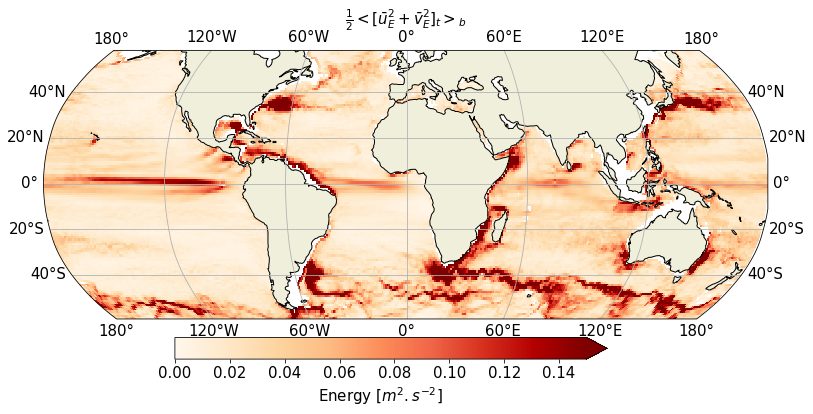

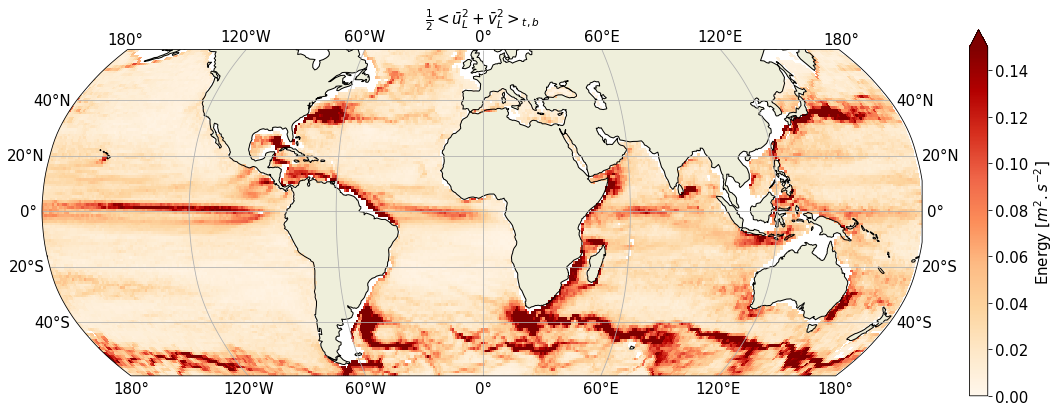

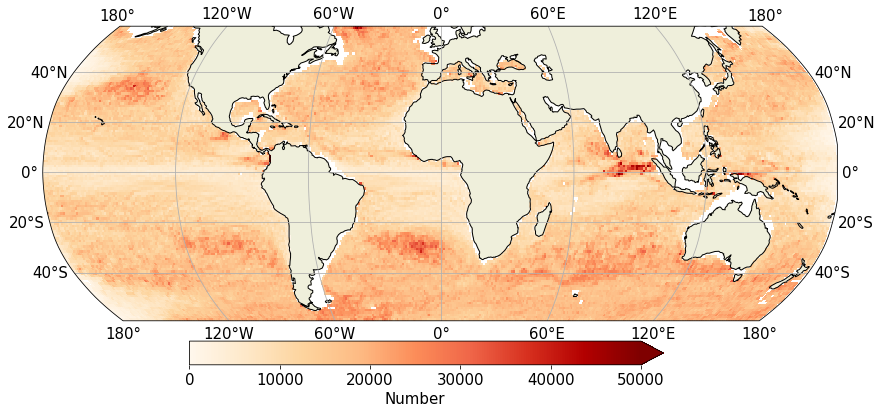

In [37]:
figsize = (15,6)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_low_dl1.E_energy,colmap=cmap,vlim=(0,0.15),
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<[\bar{u}_E^2+\bar{v}_E^2]_t>_b$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'E_energy_low.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_low_dl1.L_energy,colmap=cmap,vlim=(0,0.15),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<\bar{u}_L^2+\bar{v}_L^2>_{t,b}$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'L_energy_low.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(ds_low_dl1.L_count,colmap=cmap,vlim=(0,50000),
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Number'})
ax.set_title(r'',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'Nb_drifters.png',bbox_inches='tight')

### Figure 3 : Maps of energy in the semidiurnal band estimated from demodulated filtered velocity fields
1) Eulerian energy levels

2) Lagrangian energy levels

### Figure 4 : Map of energy ratio (Lagrangian over Eulerian)

3) Lagrangian over Eulerian energy : 2 isolines of low fequency energy are plotted (red=0.1, black=0.02)

In [6]:
L_low_smooth = ds_low_dl1.L_energy.groupby_bins('lon_bin',bins=100).mean().groupby_bins('lat_bin',bins=30).mean()
L_low_smooth = L_low_smooth.rename({'lon_bin_bins':'lon_bin','lat_bin_bins':'lat_bin'})

In [7]:
from scipy.ndimage.filters import gaussian_filter
ds_low_dl1['L_energy_smooth'] = (["lon_bin","lat_bin"],
                                 gaussian_filter(ds_low_dl1.L_energy.fillna(-1),sigma=[2,2],order=0,mode='constant'))
ds_low_dl1['L_energy_smooth'] = ds_low_dl1['L_energy_smooth'].where(ds_low_dl1['L_energy_smooth']>0)

/var/folders/8p/ctkm_wt55j54lh09mdw3yv0r00g___/T/ipykernel_1731/2114027122.py:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


In [9]:
hf_dl2

NameError: name 'hf_dl2' is not defined

In [10]:
figsize = (15,6)
cmap = 'OrRd'
fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*(hf_dl2.E_energy_SSU+hf_dl2.E_energy_SSV),lat='lat_bins',colmap=cmap,vlim=(0,0.015),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$',size=15)
fig.tight_layout()
#fig.savefig(fig_dir+'E_energy_hf.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*(hf_dl2.L_energy_SSU+hf_dl2.L_energy_SSV),lat='lat_bins',colmap=cmap,vlim=(0,0.015),**{'label':r'Energy [$m^2.s^{-2}$]'})
ax.set_title(r'$\frac{1}{2}<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}$',size=15)
fig.tight_layout()
#fig.savefig(fig_dir+'L_energy_hf.png',bbox_inches='tight')

#fig = plt.figure(figsize=figsize)
#fig,ax = plot_maps(ds_hf.L_energy/ds_hf.E_energy,colmap='coolwarm',vlim=(0.,2.),
#                  **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':''})
#(ds_low_dl1['L_energy_smooth']).plot.contour(ax=ax,transform=ccrs.PlateCarree(),
#                                     y='lat_bin',levels=[0.025,0.09],colors=['grey','black'])
#ax.set_title(r'$<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}/<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$'
#             ,size=15)
#fig.tight_layout()
#fig.savefig(fig_dir+'LE_energy_hf.png',bbox_inches='tight')



NameError: name 'hf_dl2' is not defined

<Figure size 1080x432 with 0 Axes>

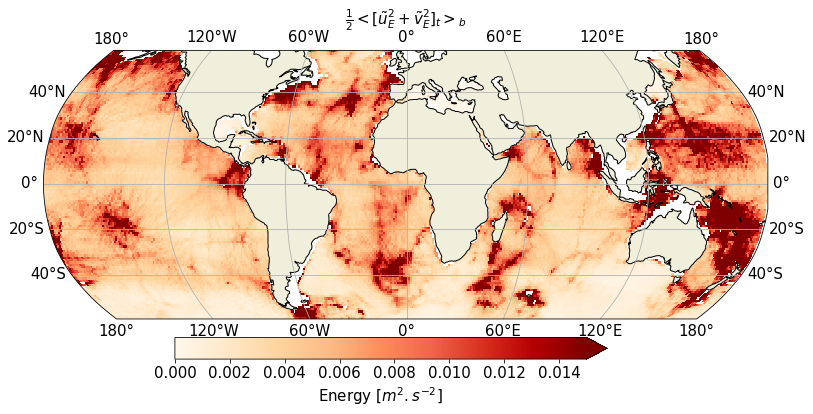

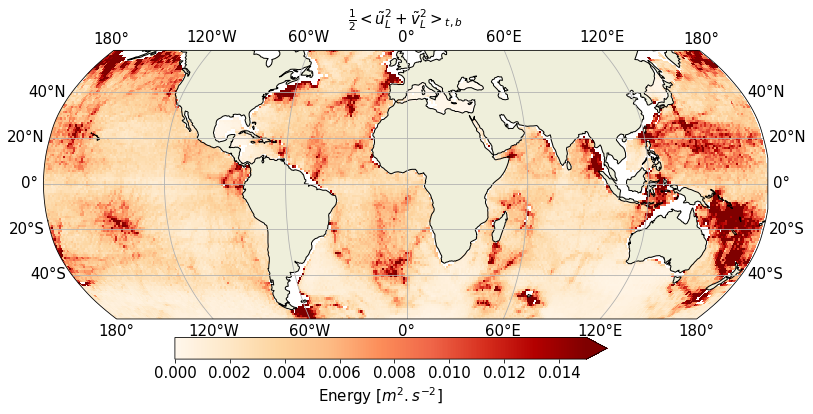

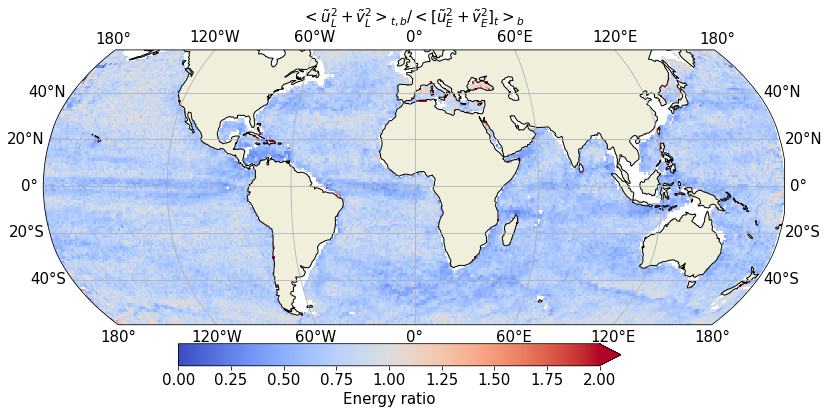

In [8]:
figsize = (15,6)
cmap = 'OrRd'
kwargs = {'orientation':'horizontal','pad':0.06,'fraction':0.07}
fig = plt.figure(figsize=figsize)
kwargs.update({'label':r'Energy [$m^2.s^{-2}$]'})
fig,ax = plot_maps(0.5*ds_hf.E_energy,colmap=cmap,vlim=(0,0.015),**kwargs)
ax.set_title(r'$\frac{1}{2}<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'E_energy_hf.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
fig,ax = plot_maps(0.5*ds_hf.L_energy,colmap=cmap,vlim=(0,0.015),**kwargs)
ax.set_title(r'$\frac{1}{2}<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}$',size=15)
fig.tight_layout()
fig.savefig(fig_dir+'L_energy_hf.png',bbox_inches='tight')

fig = plt.figure(figsize=figsize)
kwargs.update({'label': 'Energy ratio'})
fig,ax = plot_maps(ds_hf.L_energy/ds_hf.E_energy,colmap='coolwarm',vlim=(0.,2.),**kwargs)
#(ds_low_dl1['L_energy_smooth']).plot.contour(ax=ax,transform=ccrs.PlateCarree(),
#                                     y='lat_bin',levels=[0.025,0.09],colors=['grey','black'])
ax.set_title(r'$<\tilde{u}_L^2+\tilde{v}_L^2>_{t,b}/<[\tilde{u}_E^2+\tilde{v}_E^2]_t>_b$'
             ,size=15)
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_hf.png',bbox_inches='tight')


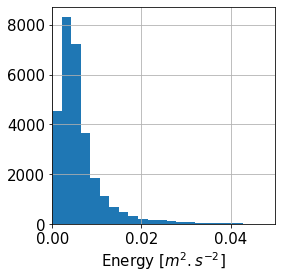

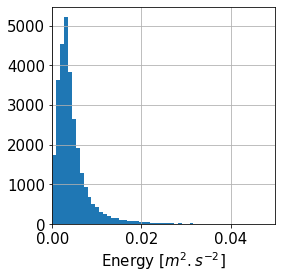

In [37]:
fig,ax = plt.subplots(figsize=(4,4))
_ = (0.5*ds_hf.E_energy).plot.hist(ax=ax,bins=1000,xlim=(0,0.05))
ax.grid();ax.set_xlabel(r'Energy [$m^2.s^{-2}$]')
fig.savefig(fig_dir+'E_energy_hist.png',bbox_inches='tight')

fig,ax = plt.subplots(figsize=(4,4))
_ = (0.5*ds_hf.L_energy).plot.hist(ax=ax,bins=1000,xlim=(0,0.05))
ax.grid();ax.set_xlabel(r'Energy [$m^2.s^{-2}$]');
fig.savefig(fig_dir+'L_energy_hist.png',bbox_inches='tight')



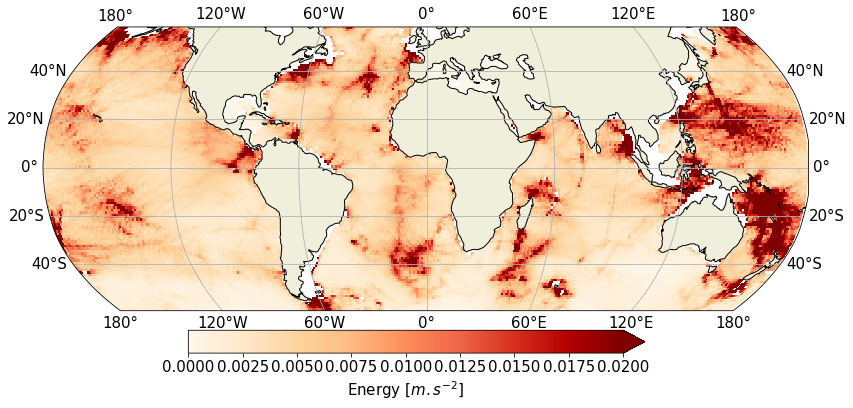

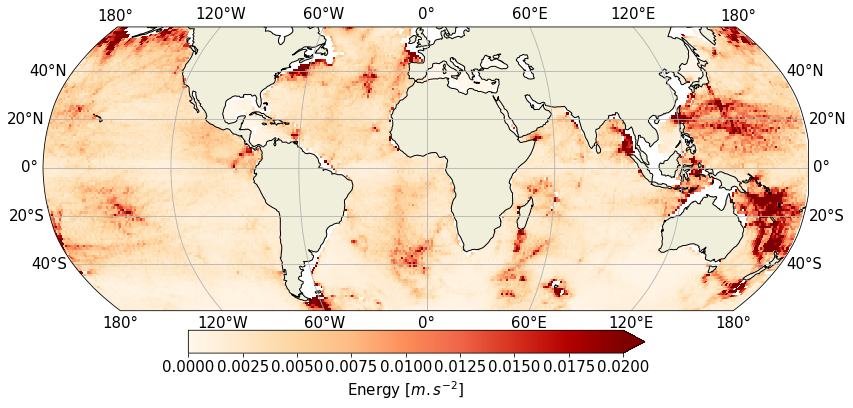

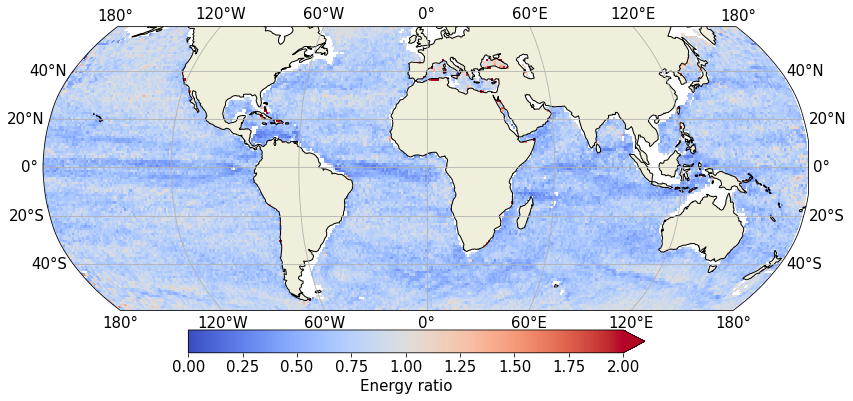

In [19]:
kwargs = {'orientation':'horizontal','pad':0.06,'fraction':0.07}
fig = plt.figure(figsize=(15,6))
fig = plot_maps(ds_hf.E_energy_SSU,lat='lat_bin',vlim=(0,0.02),colmap='OrRd',**kwargs)

fig = plt.figure(figsize=(15,6))
fig = plot_maps(ds_hf.L_energy_SSU,lat='lat_bin',vlim=(0,0.02),colmap='OrRd',**kwargs)

fig = plt.figure(figsize=(15,6))
kwargs.update({'label':'Energy ratio'})
fig = plot_maps(ds_hf.L_energy_SSU/ds_hf.E_energy_SSU,lat='lat_bin',vlim=(0,2),colmap='coolwarm',**kwargs)

(<Figure size 1080x432 with 2 Axes>,
 <GeoAxesSubplot:xlabel='lon_bin', ylabel='lat_bin'>)

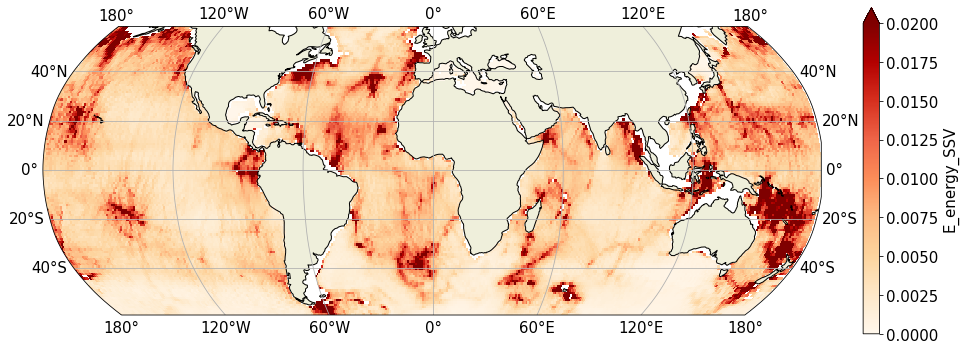

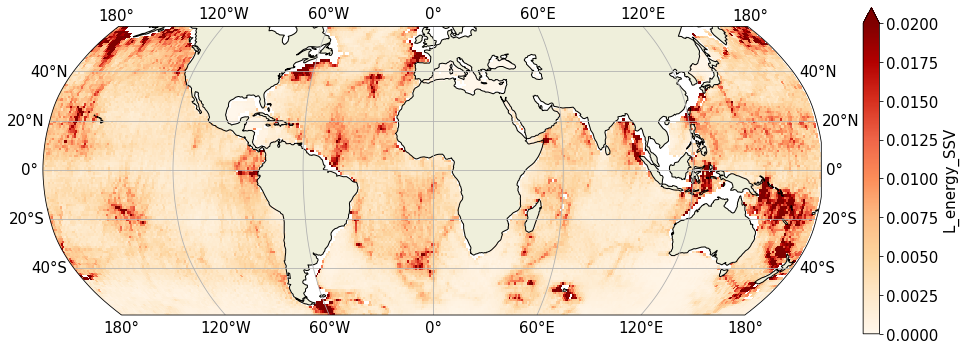

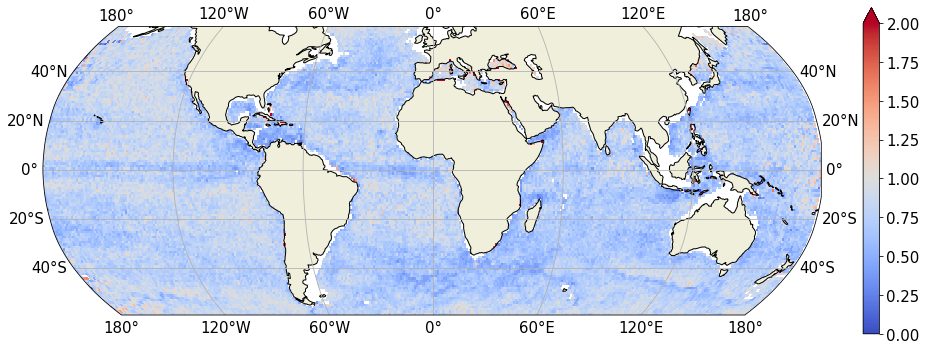

In [19]:
fig = plt.figure(figsize=(15,6))
plot_maps(ds_hf.E_energy_SSV,lat='lat_bin',vlim=(0,0.02),colmap='OrRd')

fig = plt.figure(figsize=(15,6))
plot_maps(ds_hf.L_energy_SSV,lat='lat_bin',vlim=(0,0.02),colmap='OrRd')

fig = plt.figure(figsize=(15,6))
plot_maps(ds_hf.L_energy_SSV/ds_hf.E_energy_SSV,lat='lat_bin',vlim=(0,2),colmap='coolwarm')

(<Figure size 1080x432 with 2 Axes>,
 <GeoAxesSubplot:xlabel='lon_bin', ylabel='lat_bin'>)

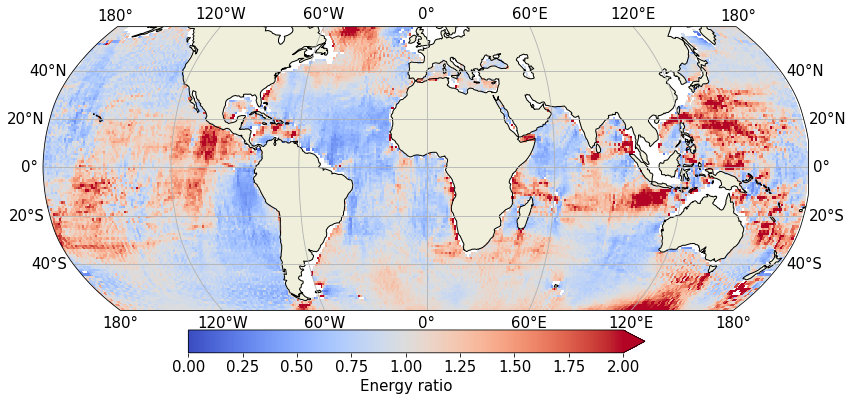

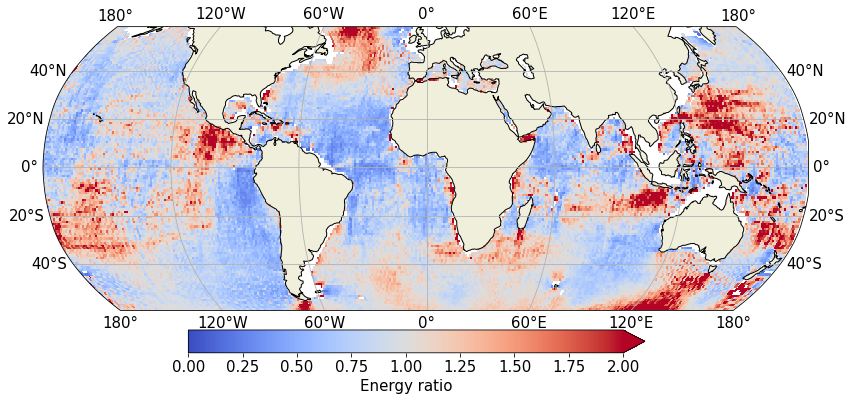

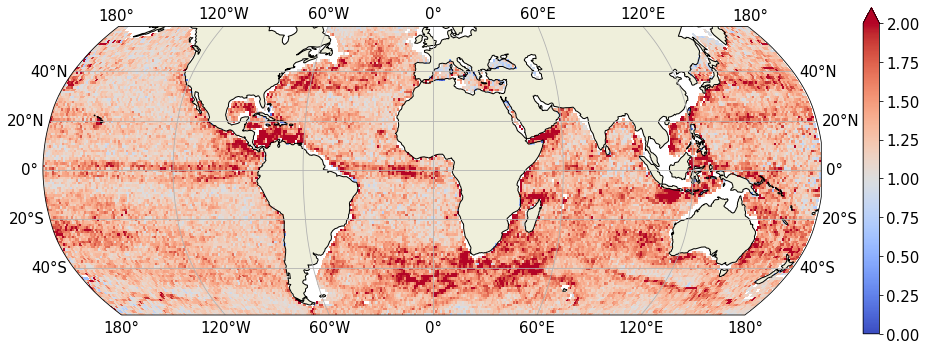

In [9]:
kwargs = {'orientation':'horizontal','pad':0.06,'fraction':0.07,'label':'Energy ratio'}
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ds_hf.E_energy_SSU/ds_hf.E_energy_SSV,lat='lat_bin',vlim=(0,2),colmap='coolwarm',**kwargs)
fig.savefig(fig_dir+'E_UV.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ds_hf.L_energy_SSU/ds_hf.L_energy_SSV,lat='lat_bin',vlim=(0,2),colmap='coolwarm',**kwargs)
fig.savefig(fig_dir+'L_UV.png')
fig = plt.figure(figsize=(15,6))
plot_maps(ds_hf.E_energy_SSV*ds_hf.L_energy_SSU/(ds_hf.L_energy_SSV*ds_hf.L_energy_SSU),lat='lat_bin',vlim=(0,2),colmap='coolwarm')



In [26]:
x = (ds_hf.E_energy_SSU.values.flatten())
y = (ds_hf.E_energy_SSV.values.flatten())

(0.0, 0.01)

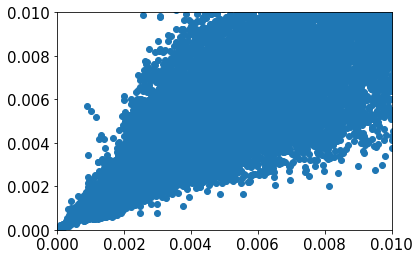

In [27]:
plt.scatter(x,y)
plt.xlim(0,0.01);
plt.ylim(0,0.01)

In [28]:
np.sort?

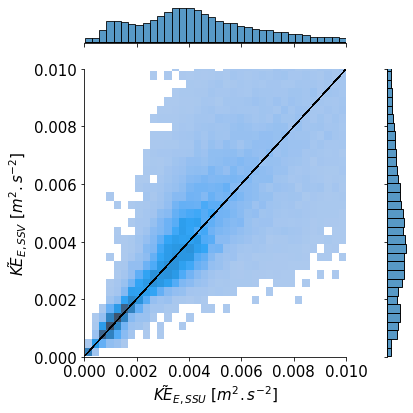

In [32]:
x = (ds_hf.E_energy_SSU.values.flatten())
y = (ds_hf.E_energy_SSV.values.flatten())
#sns.jointplot(x=Te.values.flatten(),y=Tl.values.flatten(),kind='kde',xlim=(2,100),ylim=(2,100))
axs = sns.jointplot(x=x,y=y,kind='hist',xlim=(0,0.01),ylim=(0,0.01))
axs.set_axis_labels(r'$\tilde{KE}_{E,SSU}$ [$m^2.s^{-2}$]',r'$\tilde{KE}_{E,SSV}$ [$m^2.s^{-2}$]')
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
#for ax in (axs.ax_joint, axs.ax_marg_y):
#    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
fig = axs.fig
fig.tight_layout()
#fig.savefig(fig_dir+'LE_energy_jointpdf.png')


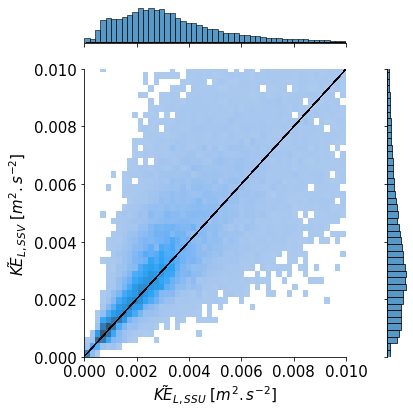

In [33]:
x = (ds_hf.L_energy_SSU.values.flatten())
y = (ds_hf.L_energy_SSV.values.flatten())
#sns.jointplot(x=Te.values.flatten(),y=Tl.values.flatten(),kind='kde',xlim=(2,100),ylim=(2,100))
axs = sns.jointplot(x=x,y=y,kind='hist',xlim=(0,0.01),ylim=(0,0.01))
axs.set_axis_labels(r'$\tilde{KE}_{L,SSU}$ [$m^2.s^{-2}$]',r'$\tilde{KE}_{L,SSV}$ [$m^2.s^{-2}$]')
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
#for ax in (axs.ax_joint, axs.ax_marg_y):
#    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
fig = axs.fig
fig.tight_layout()
#fig.savefig(fig_dir+'LE_energy_jointpdf.png')



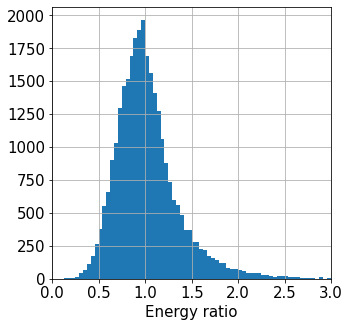

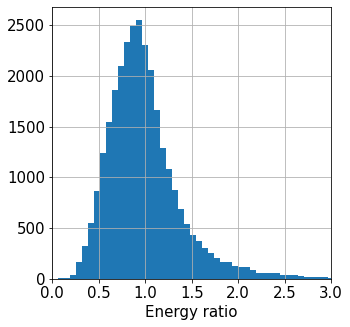

In [43]:
fig,ax = plt.subplots(figsize=(5,5))
_ = (ds_hf.E_energy_SSU/ds_hf.E_energy_SSV).plot.hist(ax=ax,bins=100,xlim=(0,3))
ax.grid();ax.set_xlabel(r'Energy ratio')
fig.savefig(fig_dir+'E_UV_hist.png',bbox_inches='tight')

fig,ax = plt.subplots(figsize=(5,5))
_ = (ds_hf.L_energy_SSU/ds_hf.L_energy_SSV).plot.hist(ax=ax,bins=100,xlim=(0,3))
ax.grid();ax.set_xlabel(r'Energy ratio');
fig.savefig(fig_dir+'L_UV_hist.png',bbox_inches='tight')


### Figure 4 : Joint pdf of energy levels

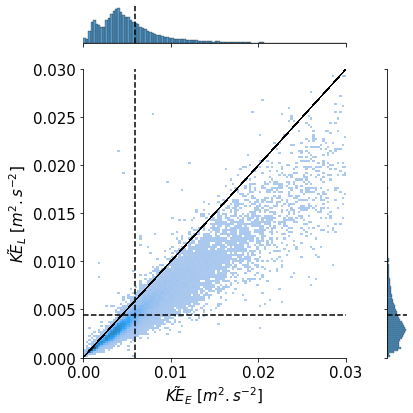

In [10]:

El = 0.5*ds_hf.L_energy
Ee = 0.5*ds_hf.E_energy
#sns.jointplot(x=Te.values.flatten(),y=Tl.values.flatten(),kind='kde',xlim=(2,100),ylim=(2,100))
axs = sns.jointplot(x=Ee.values.flatten(),y=El.values.flatten(),kind='hist',xlim=(0,0.03),ylim=(0,0.03))
axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_y):
    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_jointpdf.png')

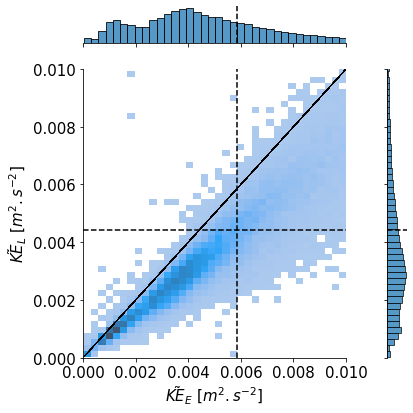

In [21]:
# Zoom of previous figure (paper version)
axs = sns.jointplot(x=Ee.values.flatten(),y=El.values.flatten(),kind='hist',xlim=(0,0.01),ylim=(0,0.01))
axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_y):
    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
#for ax in axs.ax_joint:
#    ax.text(0.007,0.0065,r'$\tilde{KE}_L=\tilde{KE}_E$')
#axs.ax_marg_x.
fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'LE_energy_jointpdf.png')

#### Additional figure 4 : Joint pdf of tidal energy ratio (x-axis) and low frequency Lagrangian energy levels (y-axis)

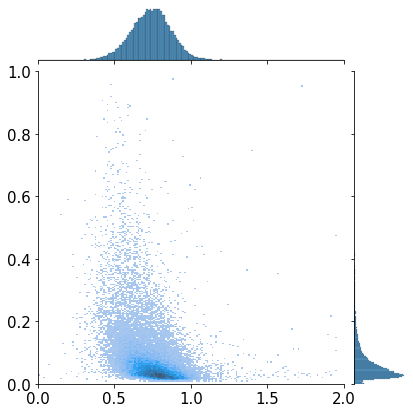

In [65]:
x = ds_hf.L_energy/ds_hf.E_energy
y = ds_low_dl1.L_energy
axs = sns.jointplot(x=x.values.flatten(),y=y.values.flatten(),kind='hist',xlim=(0,2),ylim=(0,1))
#axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
#or ax in (axs.ax_joint, axs.ax_marg_y):
#   ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
#for ax in (axs.ax_joint, axs.ax_marg_x):
#    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)
#fig = axs.fig
#fig.tight_layout()
#fig.savefig(fig_dir+'LE_energy_jointpdf.png')

### Figure 4 : Distribution of the Lagrangian over Eulerian energy ratio

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


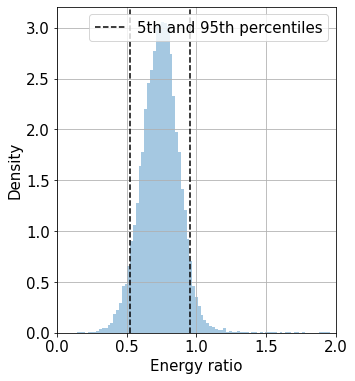

In [46]:
fig,axs = plt.subplots(figsize=(5,6))
sns.distplot(ds_hf.L_energy/ds_hf.E_energy,ax=axs,bins=np.linspace(0,2,100)
             ,hist=True,norm_hist=True,kde=False
            )
#sns.distplot(ds_hf.L_energy/ds_hf.E_energy,bins=np.linspace(0,2,1000),hist=False,norm_hist=True,kde=True)
axs.grid();axs.set_xlim(0,2)
axs.set_ylabel('Density');
axs.set_xlabel('Energy ratio');
axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.05),c='k',ls='--',label='5th and 95th percentiles');
axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.95),c='k',ls='--');
axs.legend()
#axs.axvline((ds_hf.L_energy/ds_hf.E_energy).quantile(0.95))


fig = axs.figure
fig.savefig(fig_dir+'LE_energy_hist.png')

### Autocovariance functions

In [7]:
# Load autocovariance files
file_E = root_dir +'binned_Ecov_uu_dl2.nc'
file_L = root_dir +'binned_Lcov_uu_dl2_flag10.nc'

dsE = xr.open_dataset(file_E)
dsL = xr.open_dataset(file_L)

dsEV = xr.open_dataset(root_dir +'binned_Ecov_vv_dl2.nc')
dsLV = xr.open_dataset(root_dir +'binned_Lcov_vv_dl2_flag10.nc')

### Figure 5 : Autocovariance and autocorrelation

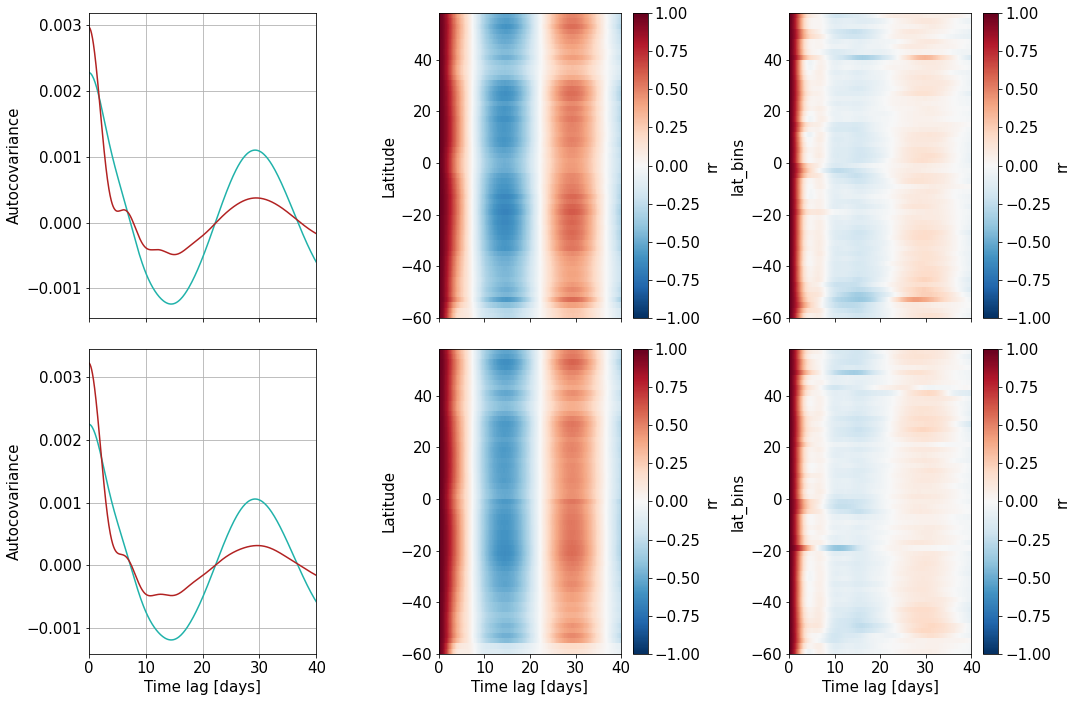

In [20]:
fig,axs = plt.subplots(2,3,figsize=(15,10),sharey=False,sharex=True)
for i,V in enumerate([[dsE,dsL], [dsEV,dsLV]]):
    V[0].rr.mean(['lon_bins','lat_bins']).plot(ax=axs[i,0],c='lightseagreen',label='Eulerian')
    V[1].rr.mean(['lon_bins','lat_bins']).plot(ax=axs[i,0],c='firebrick',label='Lagrangian')
    (V[0].rr.mean(['lon_bins'])/V[0].rr.isel(lags=0).mean(['lon_bins'])).plot(ax=axs[i,1],y='lat_bins')
    (V[1].rr.mean(['lon_bins'])/V[1].rr.isel(lags=0).mean(['lon_bins'])).plot(ax=axs[i,2],y='lat_bins')
    axs[i,0].grid();axs[i,0].set_ylabel('');axs[i,0].set_xlabel('');axs[i,1].set_xlabel('');
    axs[i,2].set_xlabel('');axs[i,1].set_ylabel('Latitude')
axs[0,0].set_ylabel('Autocovariance');axs[1,0].set_xlabel('Time lag [days]')
axs[1,0].set_ylabel('Autocovariance');axs[1,1].set_xlabel('Time lag [days]');
axs[1,2].set_xlabel('Time lag [days]')
fig.tight_layout()
#fig.savefig(fig_dir+'mean_autocov.pdf')

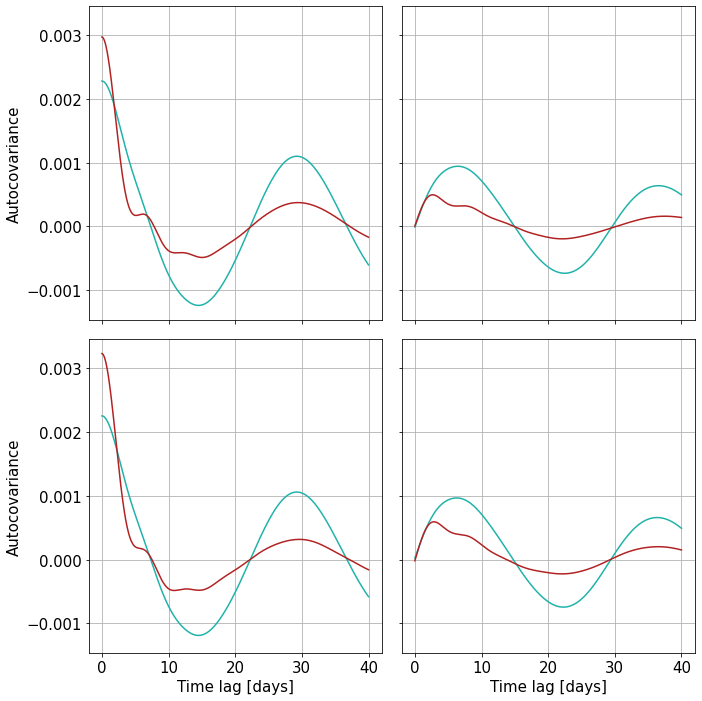

In [80]:
fig,axs = plt.subplots(2,2,figsize=(10,10),sharey=True,sharex=True)
for ax,V in zip(axs[0,:],['rr','ri']):
    dsE[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='lightseagreen',label='Eulerian')
    #(np.sign(dsE[V].mean(['lon_bins','lat_bins']))*dsE[V].std(['lon_bins','lat_bins'])
    #.plot(ax=ax,c='lightseagreen',ls='--')
    #(dsE[V].mean(['lon_bins','lat_bins'])-np.sign(dsE[V].mean(['lon_bins','lat_bins']))*dsE[V].std(['lon_bins','lat_bins'])
    #).plot(ax=ax,c='lightseagreen',ls='--')
    dsL[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='firebrick',label='Lagrangian')
    #(dsL[V].mean(['lon_bins','lat_bins'])+np.sign(dsL[V].mean(['lon_bins','lat_bins']))*dsL[V].std(['lon_bins','lat_bins'])
    #).plot(ax=ax,c='firebrick',ls='--')
    ax.grid();ax.set_ylabel('');ax.set_xlabel('')
for ax,V in zip(axs[1,:],['rr','ri']):
    dsEV[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='lightseagreen',label='Eulerian')
    dsLV[V].mean(['lon_bins','lat_bins']).plot(ax=ax,c='firebrick',label='Lagrangian')
    ax.grid();ax.set_ylabel('');ax.set_xlabel('')
axs[0,0].set_ylabel('Autocovariance');axs[1,0].set_xlabel('Time lag [days]')
axs[1,0].set_ylabel('Autocovariance');axs[1,1].set_xlabel('Time lag [days]')
fig.tight_layout()
fig.savefig(fig_dir+'mean_autocov.pdf')

### Incoherence timescale

The following timescales are estimated by fitting a theoretical gaussian model to computed and averaged autocovariance.

Model : 

$\tilde{C}(\tau) = \tilde U e^{-\tau/\tilde T}$

$\tilde U$ : Energy

$\tilde T$ : Incoherence timescale

In [7]:
#Load incoherence timescales files
dsL =  xr.open_dataset(root_dir+'L_hf_fit_gauss.nc')
dsE =  xr.open_dataset(root_dir+'E_hf_fit_gauss.nc')

### Figure 6 : Maps of incoherence timescales and their ratio

1) Eulerian timescales

2) Lagrangian timescales

3) Lagrangian voer Eulerian timescales

Following figure is additional :

4) Lagrangian - Eulerian timescales



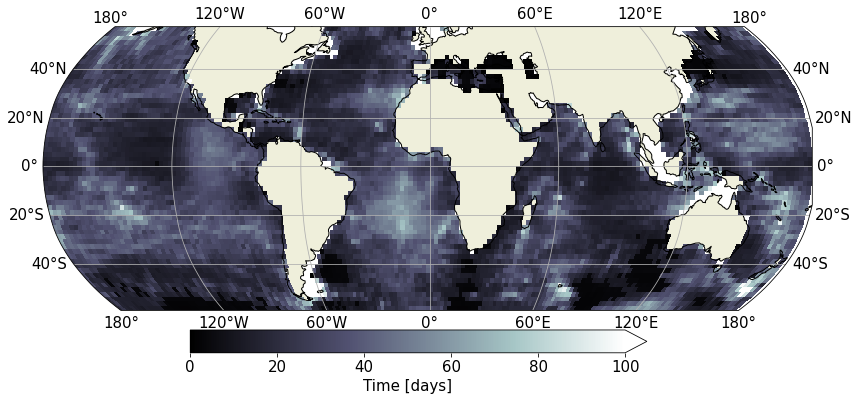

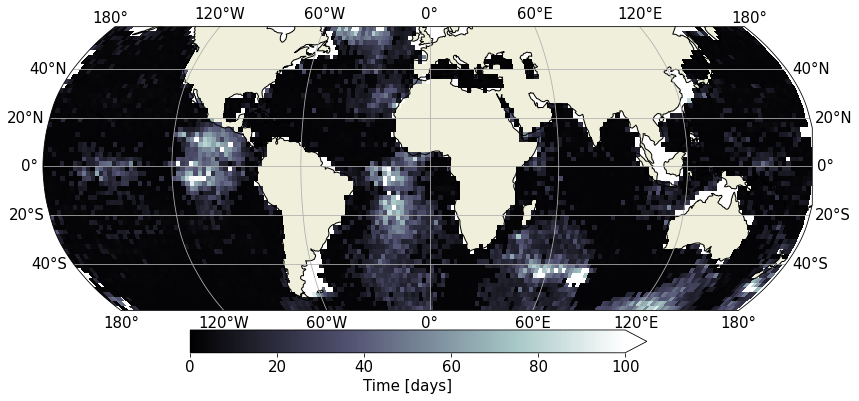

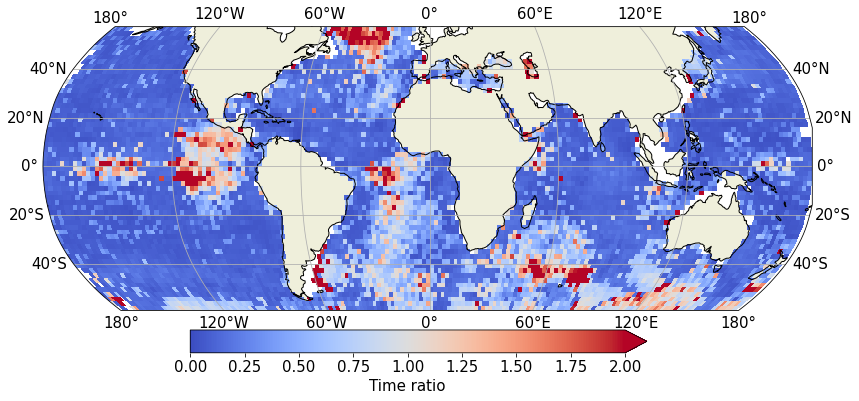

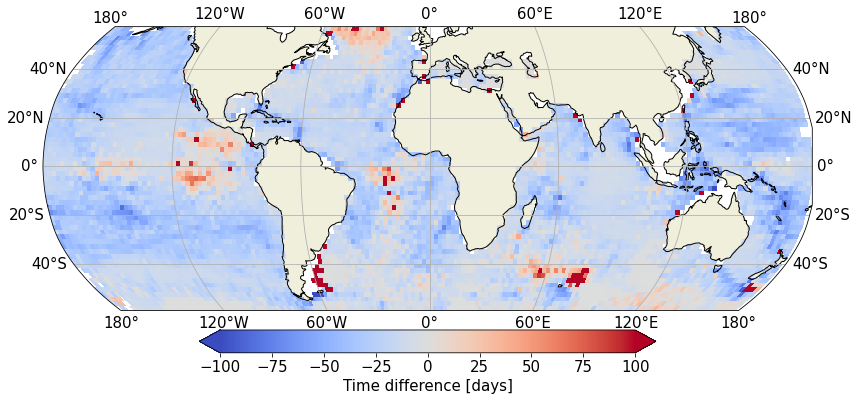

In [8]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='T').parameters_SSU,colmap='bone',vlim=(0,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [days]'})
ax.set_title('')
fig.savefig(fig_dir+'Te_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='T').parameters_SSU,colmap='bone',vlim=(0,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time [days]'})
ax.set_title('')
fig.savefig(fig_dir+'Tl_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps((dsL/dsE).sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time ratio'})
ax.set_title('')
fig.savefig(fig_dir+'TlTe_fit_gauss.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps((dsL-dsE).sel(param='T').parameters_SSU,colmap='coolwarm',vlim=(-100,100),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':'Time difference [days]'})
ax.set_title('')
fig.savefig(fig_dir+'TlTe_fit_gauss_diff.png')

#### Additional to figure 6:

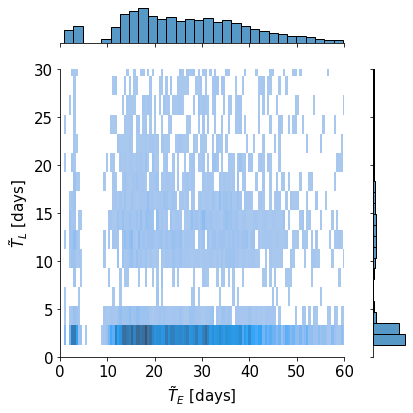

In [115]:
x = dsE.sel(param='T').parameters_SSU
y = dsL.sel(param='T').parameters_SSU
axs = sns.jointplot(x=x.values.flatten(),y=y.values.flatten(),kind='hist',xlim=(0,60),ylim=(0,30),bins=500)
axs.set_axis_labels(r'$\tilde T_E$ [days]',r'$\tilde T_L$ [days]')

fig = axs.fig
fig.tight_layout()
fig.savefig(fig_dir+'TlTe_jointpdf.png')

In [43]:
#Eulerian and Lagrangian energy
hf_dl2 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl2.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl2.0.nc')
                  ]).rename({'lon_bin':'lon_bins','lat_bin':'lat_bins'})

ds_low = xr.merge([xr.open_dataset(root_dir+'energy_SSU_low_binned_dl2.0.nc'),    #low frequency energy in 2° bins
                   xr.open_dataset(root_dir+'energy_SSV_low_binned_dl2.0.nc')])  

dsL_low_mean1 = xr.open_dataset(root_dir+'L_low_fit_mean1.nc')  #Lagrangian low frequency variance in 2° bins

### Predicting energy levels

In [21]:
from dask.distributed import Client, LocalCluster
cluster = LocalCluster()
#from dask_jobqueue import PBSCluster
#cluster = PBSCluster(processes=5, cores=5,walltime='02:00:00') #processes=7, cores=7
#w = cluster.scale(jobs=2)
#client = Client()  # set up local cluster on your laptop
client = Client(cluster) # with distributed cluster
client

<Client: 'tcp://127.0.0.1:50876' processes=4 threads=4, memory=8.00 GiB>

In [35]:
# wave
k = 2*np.pi/200e3 # rad/m
# filter
bandwidth = 0.4 # cpd
dt = 3/24 # time step in days
rad = 2*np.pi


In [36]:
#Low frequnecy motion
#Eulerian
dsE_low_mean0 = xr.open_dataset(root_dir+'E_low_fit_mean0_v2.nc')
#dsE_low_mean1 = xr.open_dataset(root_path+'E_low_fit_mean1.nc')

#Lagrangian
dsL_low_mean0 = xr.open_dataset(root_dir+'L_low_fit_mean0_v2.nc')
dsL_low_mean1 = xr.open_dataset(root_dir+'L_low_fit_mean1.nc')


#Internal tides estimated parameters (via fit)
#Eulerian
dsE = xr.open_dataset(root_dir+'E_hf_fit_gauss.nc') 
#Lagrangian
dsL = xr.open_dataset(root_dir+'L_hf_fit_gauss.nc')

#Eulerian and Lagrangian energy
hf_dl2 = xr.merge([xr.open_dataset(root_dir+'energy_SSU_hf_binned_dl2.0.nc'),
                   xr.open_dataset(root_dir+'energy_SSV_hf_binned_dl2.0.nc')
                  ]).rename({'lon_bin':'lon_bins','lat_bin':'lat_bins'})


In [37]:
def get_tidal_frequencies(*args, units="cpd"):
    """
    """
    from pytide import WaveTable
    td = WaveTable()
    if units=="cpd":
        scale=86400/2/np.pi
    elif units=="cph":
        scale=3600/2/np.pi
    else:
        # cps
        scale=1/2/np.pi
    return {c: td.wave(c).freq * scale for c in args}

tidal_omega = get_tidal_frequencies("M2", "K2","S2","N2")
omega_M2,omega_S2,omega_N2,omega_K2, domega, name = tidal_omega["M2"],tidal_omega["S2"],tidal_omega["N2"],tidal_omega["K2"], .2, "semidiurnal"
omega = (omega_M2+omega_S2)/2

omega_sn = (omega_S2-omega_M2)/2
tau = np.arange(0,dsL.lags.max()+dt,dt) #time lag
print('Spring-neap cycle : ', 1/(2*omega_sn), 'days')
print('Oscillation after demodulation ( spring-neap cycle /2): ', 1/omega_sn, 'days')

Spring-neap cycle :  14.765294045749723 days
Oscillation after demodulation ( spring-neap cycle /2):  29.530588091499446 days


In [38]:
def get_lagrangian_energy_loss( bandwidth, ds, U=1, 
                               Ce=None,axis=-1, 
                               full_output=False,
                               _factor_dtau=100,
                               _factor_tau_max=100,
                              ):
    """ compute the lagrangian loss of energy following Caspar-Cohen et al. 2022
    
    Parameters
    ----------
    omega: float
        wave frequency
    bandwidth: float
        filter bandwidth
    ds: xr.Dataset
        Dataset containing T, k, Ubar, Tbar
    Ce: lambda
        Eulerian autocorrelation signature must look like Ce(tau, U, T)
    """
    # util params
    day2sec = 86400
#    U = 1
    #omega0 = (omega[0]+omega[1])/2
    # check all variables are here
    input_variables = ["T", "k", "Ubar", "Tbar"]
    assert all([v in ds for v in input_variables]), \
        "one of T, k, Ubar, Tbar is missing from ds"
    ds = ds.set_coords(input_variables)

    # default autocorrelation
    if Ce is None:
        Ce = lambda tau, U, T: U * np.exp(-np.abs(tau/T)**2) * np.cos(2*np.pi*omega*tau)#(np.cos(2*np.pi*omega[0]*tau) + np.cos(2*np.pi*omega[1]*tau))
        
    # derives Lagrangian
#    sigma = lambda tau, Ub, Tb: Tb*day2sec*Ub*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    sigma = lambda tau, Ub, Tb: (Tb*day2sec*Ub)*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    Cl = lambda tau, U, T, k, Ub, Tb: Ce(tau, U, T) * np.exp(- (sigma(tau, Ub, Tb)*k)**2 /2)

    # build lags
    tau_max = T*_factor_tau_max
    dtau = 2*np.pi/omega/_factor_dtau
    ds = ds.assign_coords(tau=("tau", np.arange(0, tau_max, dtau)))
    
    # build covariance
    ds["Ce"] = Ce(ds.tau, U, ds["T"])
    #ds["sigma"] = sigma(ds.tau, ds.Ubar, ds.Tbar)
    #ds["exp_sigma"] = np.exp(- (sigma(ds.tau, ds.Ubar, ds.Tbar)*ds.k)**2 /2)
    ds["Cl"] = Cl(ds.tau, U, ds["T"], ds.k, ds.Ubar, ds.Tbar)
    # build power density spectrum
    N = ds.tau.size
    if axis==-1:
        input_dims_Ce, input_dims_Cl = ["tau"],["tau"]
        output_dims_Ce, output_dims_Cl = ["omega"], ["omega"]
    elif axis==0:
        dim = 'k'
        input_dims_Ce = ["tau"]#[d for d in ds.Ce.dims]
        output_dims_Ce = ["omega"]#+[d for d in ds.Ce.dims[1:]]
    
        input_dims_Cl = ["tau","k"]#[d for d in ds.Cl.dims]
        output_dims_Cl = ["omega","k"]#+[d for d in ds.Cl.dims[1:]]
    print(input_dims_Cl,output_dims_Cl)
    def dct(C,input_dims,output_dims):
        return xr.apply_ufunc(lambda C: fft.dct(C, type=3,axis=axis) * dtau,
                              C,
                              dask="parallelized",
                              input_core_dims=[input_dims],
                              output_core_dims=[output_dims],
                              dask_gufunc_kwargs=dict(output_sizes=dict(omega=N)), #[[N]]
                             )
    
    ds["Ee"] = dct(ds.Ce,input_dims_Ce,output_dims_Ce)
    ds["El"] = dct(ds.Cl,input_dims_Cl,output_dims_Cl)
#    ds["Ee"] = xr.DataArray(fft.dct(ds.Ce.values,type=3,axis=axis)*dtau)
#    ds["El"] = fft.dct(ds.Cl.values,type=3,axis=axis)
    ds["omega"] = (2*np.arange(N)+1)/4/N /dtau
    
    # integrate within filter band
    Ee = (ds.Ee
          .where( np.abs(ds.omega-omega)<bandwidth/2, other=0 )
          .integrate("omega")
         )
    El = (ds.El
          .where( np.abs(ds.omega-omega)<bandwidth/2, other=0 )
          .integrate("omega")
         )
    ds["ratio"] = El/Ee
    if full_output:
        return ds
    else:
        return Ee,El,ds.ratio

In [39]:
#### Estimation of k using woa data

vmodes = xr.open_dataset(root_dir+'vmodes_from_woa18.nc')

omega_Earth = 7.2921*1e-5 #rad.s-1
f = 2*omega_Earth*np.sin(2*np.pi*vmodes.lat/360) #rad.s-1
#vmodes.lat
day2sec = 3600*24

_k = np.sqrt(((rad*omega/day2sec)**2-(f)**2)/(vmodes.c)**2) #rad/m
L = rad/_k*1e-3
L = L.rename({'lat':'lat_bins','lon':'lon_bins'})

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: invalid value encountered in sqrt
  result_data = func(*input_data)


In [40]:
_k = _k.groupby_bins('lon',bins=np.arange(-180,180,2)
                    ).mean().groupby_bins('lat',bins=np.arange(-60,60,2)
                                         ).mean()

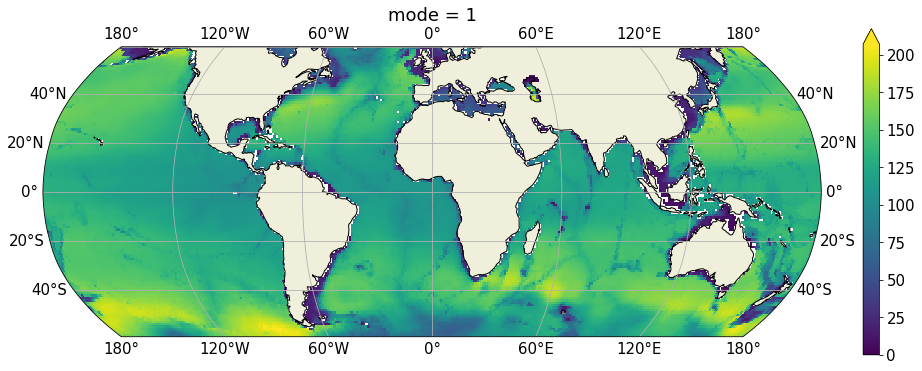

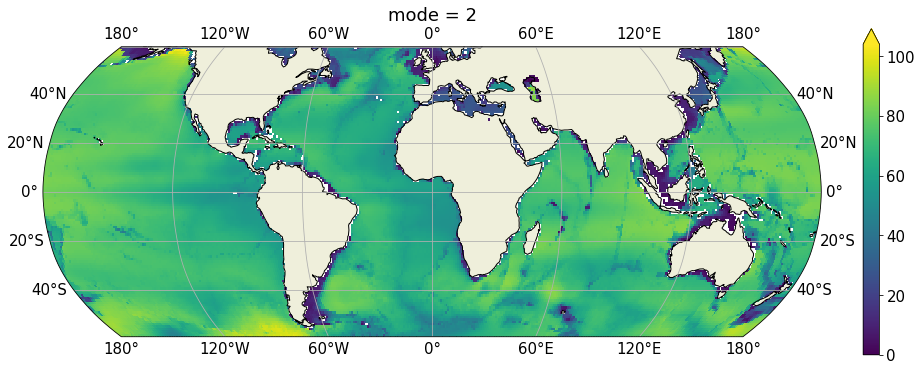

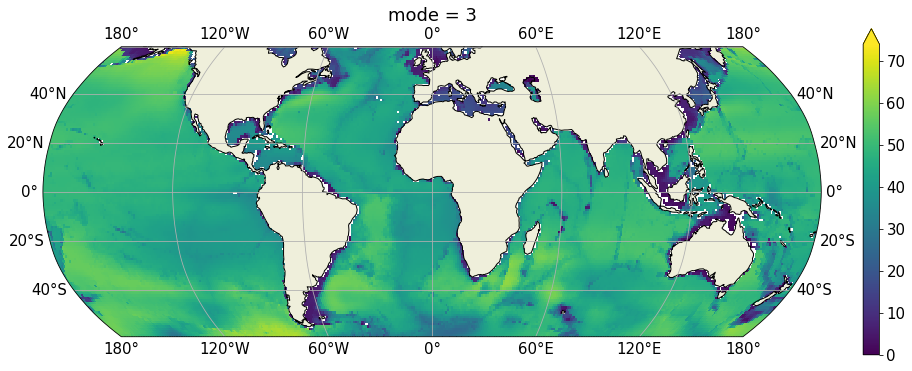

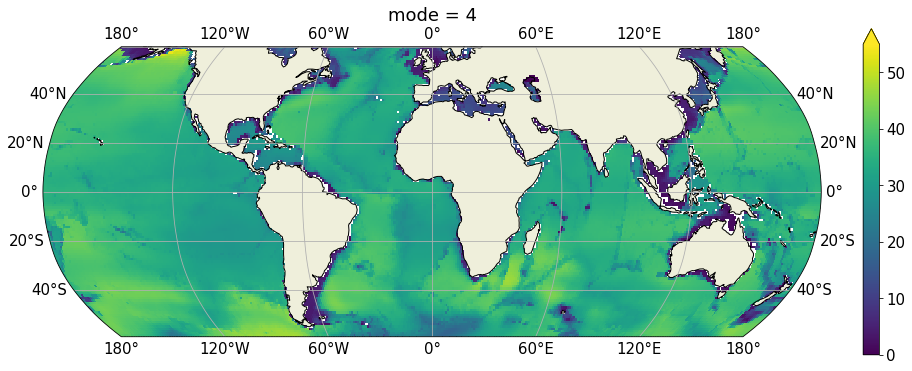

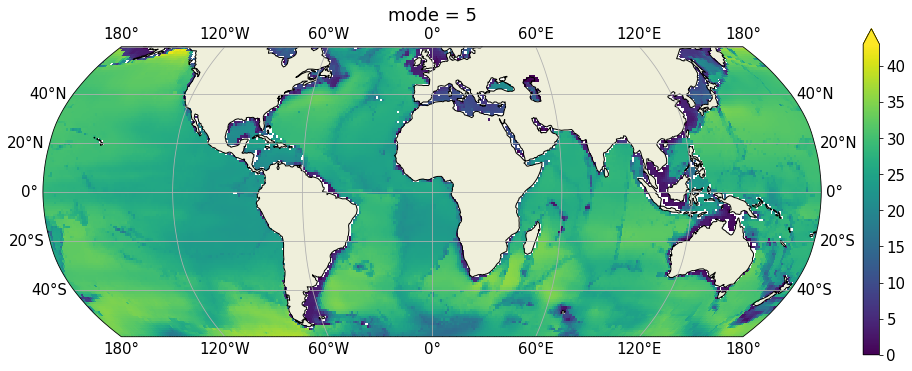

In [41]:
for mode in range(1,6):
    _ds = L.sel(mode=mode).sel(lat_bins=slice(-60,60))
    fig=plt.figure(figsize=(15,6))
    plot_maps(_ds,lat='lat_bins',vlim=(0,np.around(_ds.max().values)),colmap='viridis')

In [44]:
# Timescales

Tlbar = dsL_low_mean1.sel(param='T').parameters_SSU.values     # Lagrangian low frequency decorrelation timescale
Te = dsE.sel(param='T').parameters_SSU.values                  # Eulerian incoherence timescale
Tl = dsL.sel(param='T').parameters_SSU.values                  # Lagrangian incoherence timescale

TlbarV = dsL_low_mean1.sel(param='T').parameters_SSV.values    # Lagrangian low frequency decorrelation timescale
TeV = dsE.sel(param='T').parameters_SSV.values                 # Eulerian incoherence timescale
TlV = dsL.sel(param='T').parameters_SSV.values                 # Lagrangian incoherence timescale

T = np.nanmean(Tl)


# Energy
Ulbar = ds_low.L_energy_SSU.values                             # Lagrangian low frequency energy (SSU)
Vlbar = ds_low.L_energy_SSV.values                             # Lagrangian low frequency energy (SSV)

#U = dsE.rr.isel(lags=0).values
Ue = hf_dl2.E_energy_SSU.values                                # Eulerian semidiurnal energy  (SSU)
Ul = hf_dl2.L_energy_SSU.values                                # Lagrangian semidiurnal energy  (SSU)
Ve = hf_dl2.E_energy_SSV.values                                # Eulerian semidiurnal energy  (SSV)
Vl = hf_dl2.L_energy_SSV.values                                # Lagrangian semidiurnal energy  (SSV)
#dsE_out.sel(param='V').parameters.values
#Ul = dsL_out.sel(param='V').parameters.values

#k = _k.sel(mode=1).sel(lat=slice(-60,60))

In [45]:
#New datasets with all necessary parameters
mode=2
#SSU
ds = xr.Dataset(dict(T=(["lon_bins",'lat_bins'],Te),
                     k=(["lon_bins","lat_bins"],_k.sel(mode=mode).transpose('lon_bins','lat_bins').values),
                     Ubar=(["lon_bins",'lat_bins'], np.sqrt(Ulbar)),
                     Tbar=(["lon_bins",'lat_bins'], Tlbar.T), U=(["lon_bins",'lat_bins'], Ue),
                     lon_bins=(["lon_bins"],hf_dl2.lon_bins.values),lat_bins=(["lat_bins"],hf_dl2.lat_bins.values)))

#SSV
dsV = xr.Dataset(dict(T=(["lon_bins",'lat_bins'],TeV),
                      k=(["lon_bins","lat_bins"],_k.sel(mode=mode).transpose('lon_bins','lat_bins').values),
                      Ubar=(["lon_bins",'lat_bins'], np.sqrt(Vlbar)),
                     Tbar=(["lon_bins",'lat_bins'], TlbarV.T), U=(["lon_bins",'lat_bins'], Ve),
                     lon_bins=(["lon_bins"],hf_dl2.lon_bins.values),lat_bins=(["lat_bins"],hf_dl2.lat_bins.values)))




In [46]:
Ee,El,ratio = get_lagrangian_energy_loss( bandwidth, ds, U=ds.U, _factor_tau_max=10)
Ee_V,El_V,ratio_V = get_lagrangian_energy_loss(bandwidth, dsV, U=ds.U, _factor_tau_max=10,axis=-1)

['tau'] ['omega']
['tau'] ['omega']


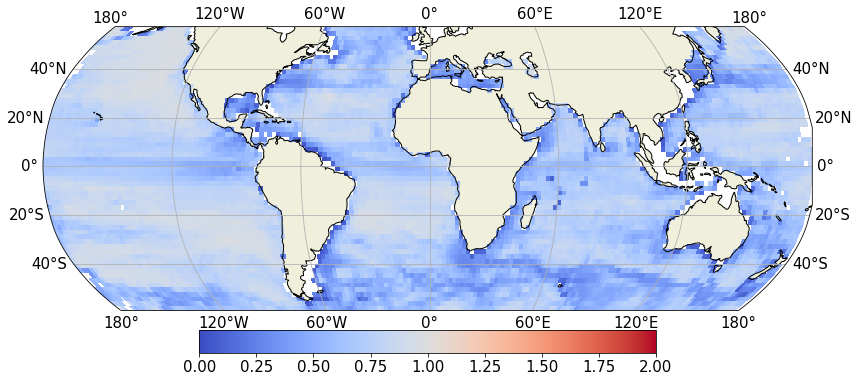

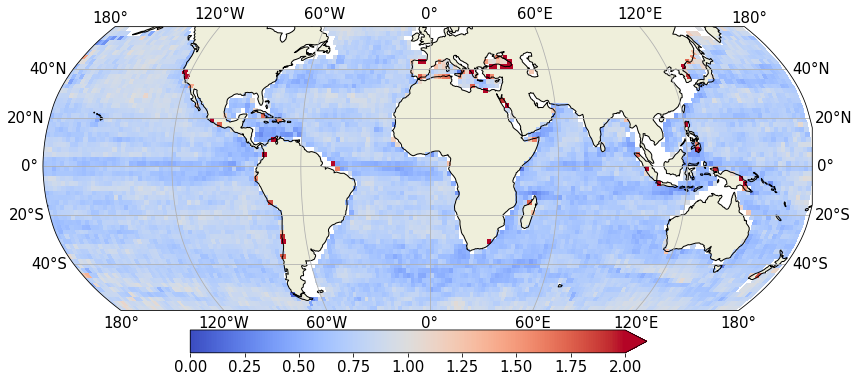

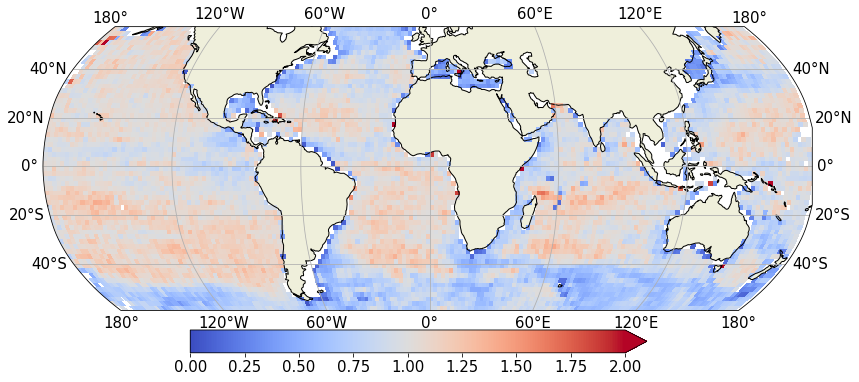

In [47]:
kwargs = {'orientation':'horizontal','fraction':0.07,'pad':0.06}
fig=plt.figure(figsize=(15,6))
fig,ax = plot_maps(((El+El_V)/(Ee+Ee_V)),
                    lat='lat_bins',vlim=(0,2),colmap='coolwarm',**kwargs)
#ax.set_title('Predicted ratio')

fig=plt.figure(figsize=(15,6))
fig,ax = plot_maps(((hf_dl2.L_energy_SSU+hf_dl2.L_energy_SSV)/(hf_dl2.E_energy_SSU+hf_dl2.E_energy_SSV)
                    ).where(hf_dl2.waterdepth>500)
            ,lat='lat_bins',vlim=(0,2),colmap='coolwarm',**kwargs)
#ax.set_title('Predicted ratio')
fig=plt.figure(figsize=(15,6))
fig,ax = plot_maps(((El+El_V)/(Ee+Ee_V))/((hf_dl2.L_energy_SSU+hf_dl2.L_energy_SSV)/(hf_dl2.E_energy_SSU+hf_dl2.E_energy_SSV)).where(hf_dl2.waterdepth>500)
              ,lat='lat_bins',vlim=(0,2),axes=111,colmap='coolwarm',**kwargs)
#ax.set_title('Predicted/diagnosed, mode=%s'%mode)

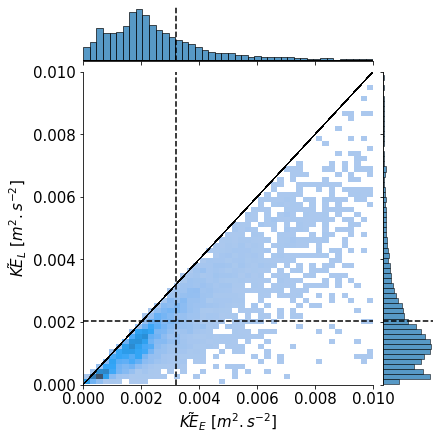

In [49]:
_El = El.values.flatten()
axs = sns.jointplot(x=Ee.values.flatten(),y=_El,kind='hist',xlim=(0,0.01),ylim=(0,0.01))
axs.set_axis_labels(r'$\tilde{KE}_E$ [$m^2.s^{-2}$]',r'$\tilde{KE}_L$ [$m^2.s^{-2}$]')
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.axvline(axs.x[axs.x<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_y):
    ax.axhline(axs.y[axs.y<0.03].mean(), color='k', ls='--', lw=1.5)
for ax in (axs.ax_joint, axs.ax_marg_x):
    ax.plot(axs.x.values,axs.x.values, c='k', lw=0.5)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


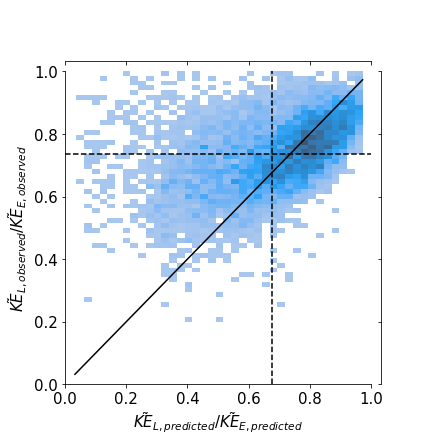

In [50]:
x = ((El+El_V)/(Ee+Ee_V)).values.flatten()
y = ((hf_dl2.L_energy_SSU+hf_dl2.L_energy_SSV)/(hf_dl2.E_energy_SSU+hf_dl2.E_energy_SSV)
        ).where(hf_dl2.waterdepth>500).values.flatten()
g = sns.JointGrid(x, y,xlim=(0,1),ylim=(0,1))
axs = g.plot_joint(sns.histplot)
axs.set_axis_labels(r'$\tilde{KE}_{L,predicted}/\tilde{KE}_{E,predicted}$',
                        r'$\tilde{KE}_{L,observed}/\tilde{KE}_{E,observed}$');
axs.ax_joint.axvline(axs.x[axs.x<1].mean(), color='k', ls='--', lw=1.5)
#    for ax in (axs.ax_joint, axs.ax_marg_y):
axs.ax_joint.axhline(axs.y[axs.y<1].mean(), color='k', ls='--', lw=1.5);
axs.ax_joint.plot(np.sort(x),np.sort(x),c='k',lw=1.5)
    #for ax in (axs.ax_joint):
    #g.plot(lambda x : x)#, c='k', lw=0.5)

### Eulerian energy levels (not working)

In [ ]:
# wave
k = 2*np.pi/200e3 # rad/m
# filter
bandwidth = 0.4 # cpd
dt = 3/24 # time step in days
rad = 2*np.pi



In [ ]:
#New datasets with all necessary parameters

#SSU
ds = xr.Dataset(dict(T=(["lon",'lat'],Tl.T), k=k, Ubar=(["lon",'lat'], np.sqrt(Ulbar)),
                     Tbar=(["lon",'lat'], Tlbar.T), U=(["lon",'lat'], Ul)))

#SSV
dsV = xr.Dataset(dict(T=(["lon",'lat'],TlV.T), k=k, Ubar=(["lon",'lat'], np.sqrt(Vlbar)),
                     Tbar=(["lon",'lat'], TlbarV.T), U=(["lon",'lat'], Vl)))
#ds = xr.Dataset(dict(T=(["lon",'lat'],Te), k=k, Ubar=(["lon",'lat'], np.sqrt(Ulbar)),
#                     Tbar=(["lon",'lat'], Tlbar.T), U=(["lon",'lat'], Ue)))
#ds = ds.chunk({"lon":10,'lat':10})

In [35]:
def get_eulerian_energy(ds,model='gauss',axis=-1,_factor_tau_max=10,_factor_dtau=100):
    day2sec = 86400
    #    U = 1
    omega0 = (omega_M2+omega_S2)/2
    omega_sn = (omega_S2-omega_M2)
        # check all variables are here
    input_variables = ["T", "k", "Ubar", "Tbar"]
    assert all([v in ds for v in input_variables]), \
        "one of T, k, Ubar, Tbar is missing from ds"
    #ds = ds.isel(lon=slice(0,None,4),lat=slice(0,None,4))
    ds = ds.set_coords(input_variables)

    # default autocorrelation
    if model=='gauss':
        Cl = lambda tau, U, T: U * np.exp(-np.abs(tau/T)**2) * (np.cos(2*np.pi*tau*omega0))
    elif model=='exp':
        Cl = lambda tau, U, T: U * np.exp(-np.abs(tau/T)) * (np.cos(2*np.pi*omega0*tau))
    else:
        print('Unknown model')
        # derives Lagrangian
    #    sigma = lambda tau, Ub, Tb: Tb*day2sec*Ub*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    sigma = lambda tau, Ub, Tb: (Tb*day2sec*Ub)*np.sqrt(2*(tau/Tb - (1-np.exp(-np.abs(tau/Tb)))))
    Ce = lambda tau, U, T, k, Ub, Tb: Cl(tau, U, T) * np.exp( (sigma(tau, Ub, Tb)*k)**2 /2)

        # build lags
    tau_max = np.nanmean(Tl)*_factor_tau_max
    dtau = 2*np.pi/omega0/_factor_dtau
    ds = ds.assign_coords(tau=("tau", np.arange(0, tau_max, dtau)))

    ds["Cl"] = Cl(ds.tau, ds.U, ds["T"])
    ds["Ce"] = Ce(ds.tau, ds.U, ds["T"], ds.k, ds.Ubar, ds.Tbar)
    ds["sigma"] = sigma(ds.tau,ds.Ubar,ds.Tbar)
    N = ds.tau.size
    if axis==-1:
        input_dims_Ce, input_dims_Cl = ["tau"],["tau"]
        output_dims_Ce, output_dims_Cl = ["omega"], ["omega"]
    elif axis==0:
        dim = 'k'
        input_dims_Cl = ["tau"]#[d for d in ds.Ce.dims]
        output_dims_Cl = ["omega"]#+[d for d in ds.Ce.dims[1:]]

        input_dims_Ce = ["tau","k"]#[d for d in ds.Cl.dims]
        output_dims_Ce = ["omega","k"]#+[d for d in ds.Cl.dims[1:]]
    print(input_dims_Cl,output_dims_Cl)
    def dct(C,input_dims,output_dims):
        return xr.apply_ufunc(lambda C: fft.dct(C, type=3,axis=axis) * dtau,
                                  C,
                                  dask="parallelized",
                                  input_core_dims=[input_dims],
                                  output_core_dims=[output_dims],
                                  dask_gufunc_kwargs=dict(output_sizes=dict(omega=N)), #[[N]]
                                 )
    ds["Ee"] = dct(ds.Ce.where(ds.Ce<np.inf).fillna(-1),input_dims_Ce,output_dims_Ce)
    ds["El"] = dct(ds.Cl,input_dims_Cl,output_dims_Cl)
    ds["omega"] = (2*np.arange(N)+1)/4/N /dtau
    
    # integrate within filter band
    Ee = (ds.Ee
          .where( np.abs(ds.omega-omega0)<bandwidth/2, other=0 )
          .integrate("omega")
             )
    El = (ds.El
              .where( np.abs(ds.omega-omega0)<bandwidth/2, other=0 )
              .integrate("omega")
             )
    Ee = Ee.assign_coords({'lat':dsE.lat_bins.values,'lon':dsE.lon_bins.values})
    El = El.assign_coords({'lat':dsE.lat_bins.values,'lon':dsE.lon_bins.values})

    Ee = Ee.rename({'lat':'lat_bins','lon':'lon_bins'})
    El = El.rename({'lat':'lat_bins','lon':'lon_bins'})
    ds["ratio"] = El/Ee
    return Ee,El,ds

In [36]:
Ee,El,out = get_eulerian_energy(ds,model='gauss',_factor_tau_max=10)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


['tau'] ['omega']


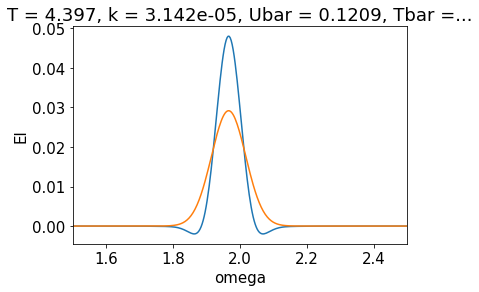

In [22]:
out.Ee.isel(lon=0,lat=10).plot(xlim=(1.5,2.5))
out.El.isel(lon=0,lat=10).plot(xlim=(1.5,2.5))
#plt.yscale('log')

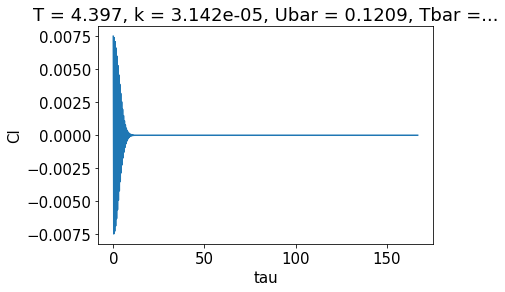

In [23]:
out.Cl.isel(lon=0,lat=10).plot()

Text(0.5, 1.0, 'Observed Lagrangian')

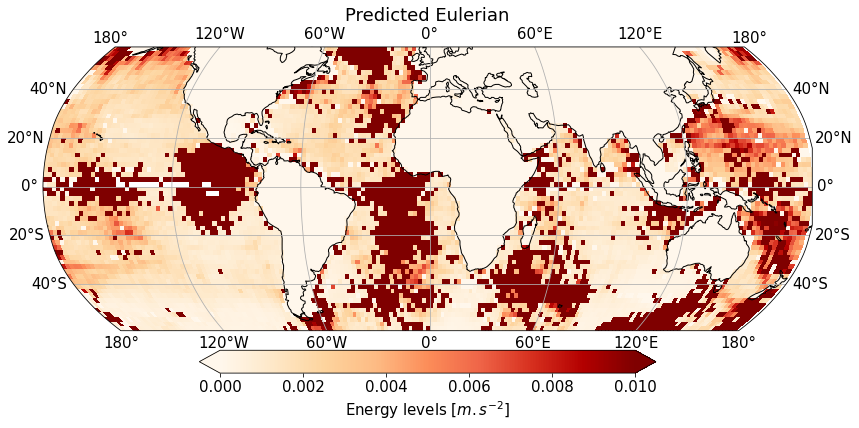

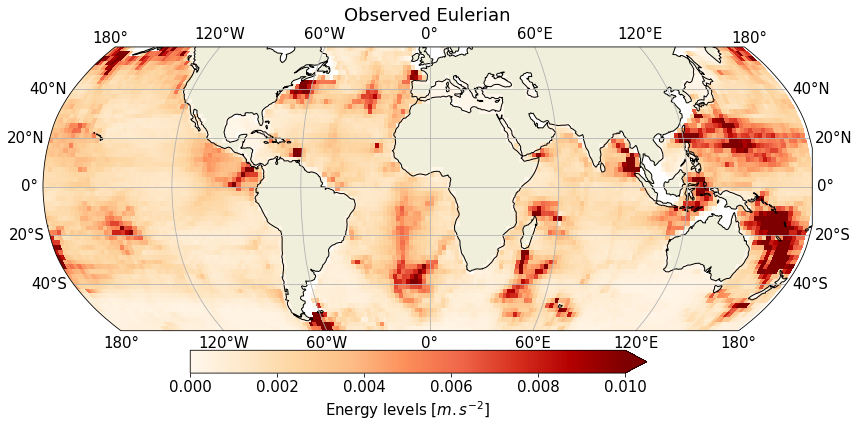

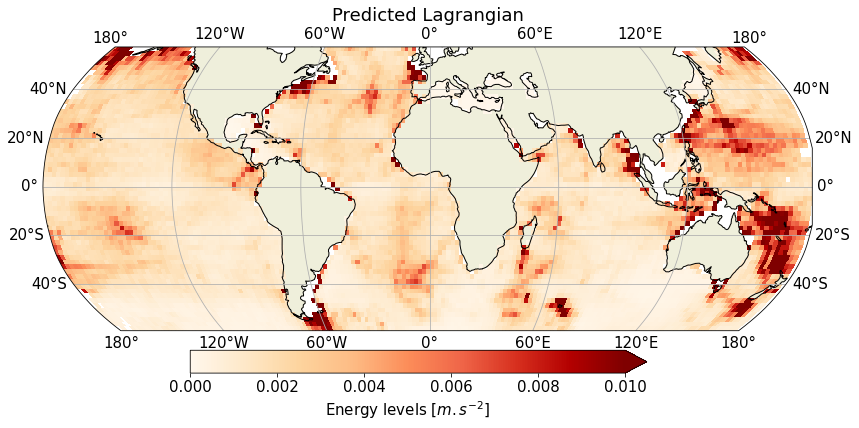

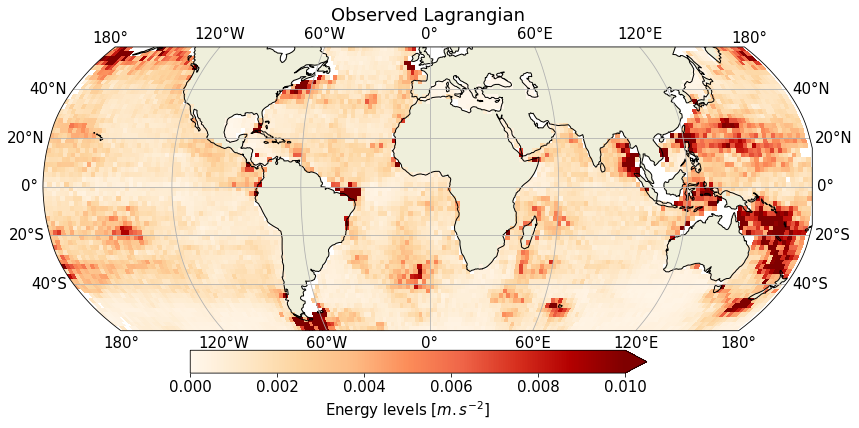

In [28]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='U').parameters_SSU,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='U').parameters_SSU,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

Text(0.5, 1.0, 'Lagrangian')

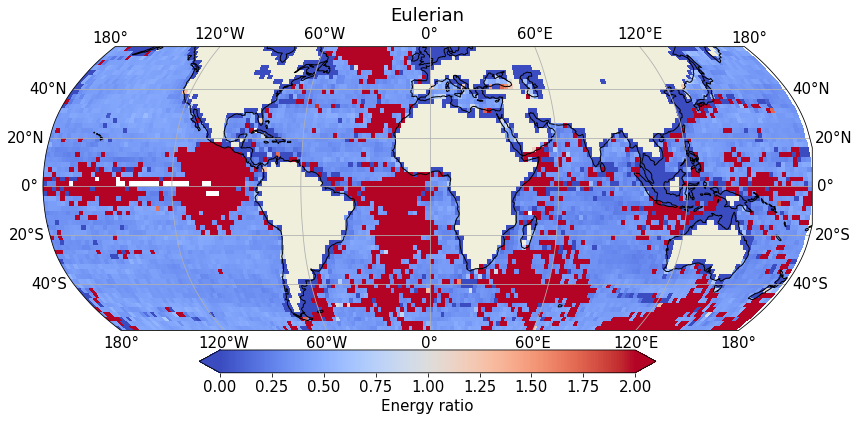

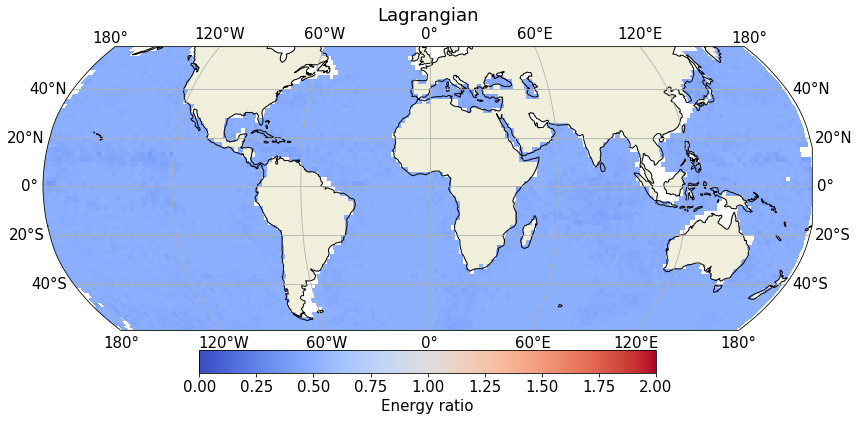

In [37]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee/Ue,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El/Ul,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')

Text(0.5, 1.0, 'Lagrangian')

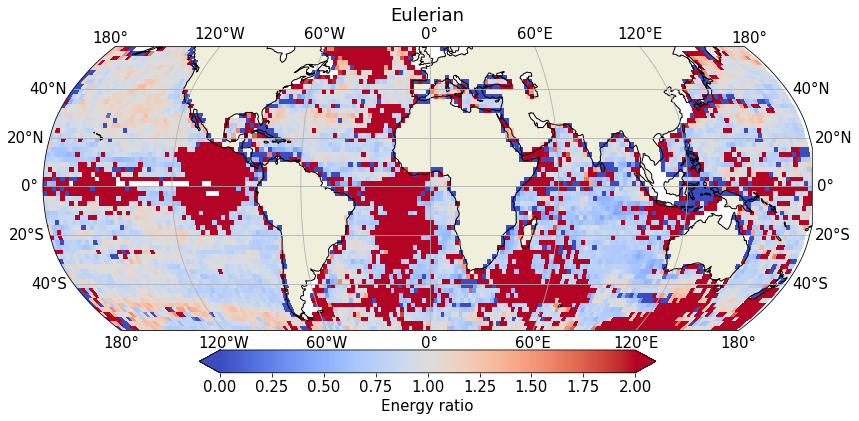

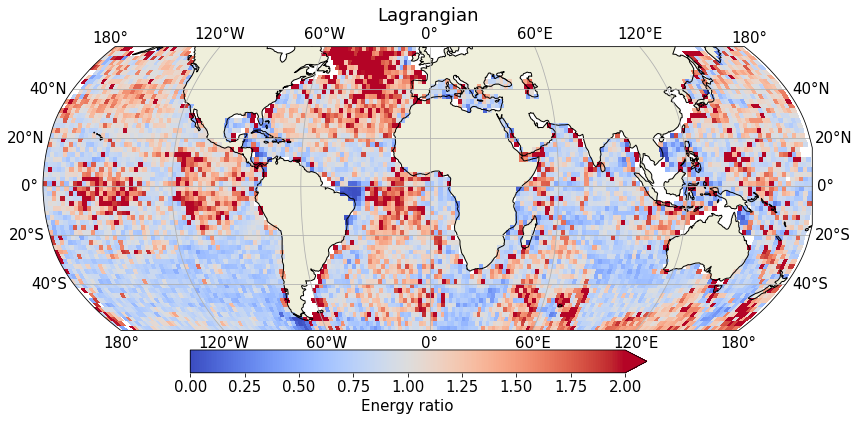

In [29]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(Ee/Ue,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(El/Ul,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

In [38]:
EeV,ElV,outV = get_eulerian_energy(dsV)

/opt/anaconda3/envs/croco/lib/python3.8/site-packages/xarray/core/computation.py:727: RuntimeWarning: overflow encountered in exp
  result_data = func(*input_data)


['tau'] ['omega']


Text(0.5, 1.0, 'Observed Lagrangian')

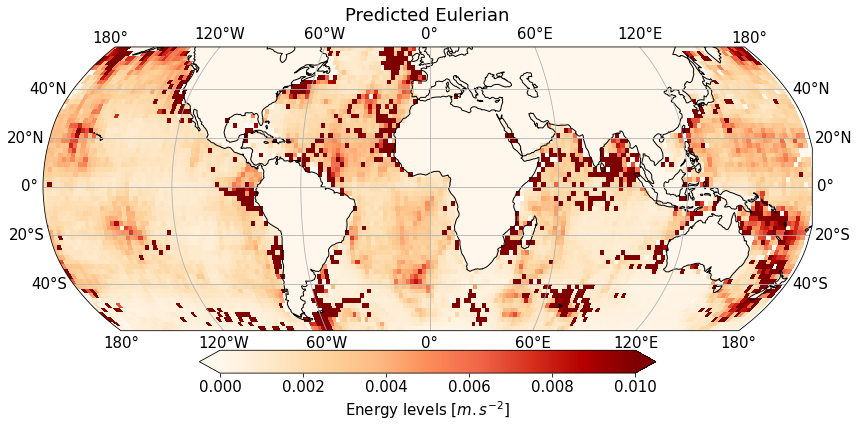

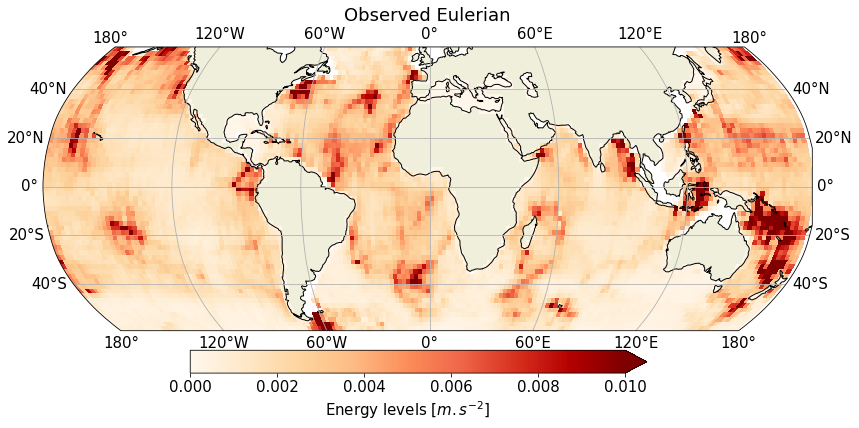

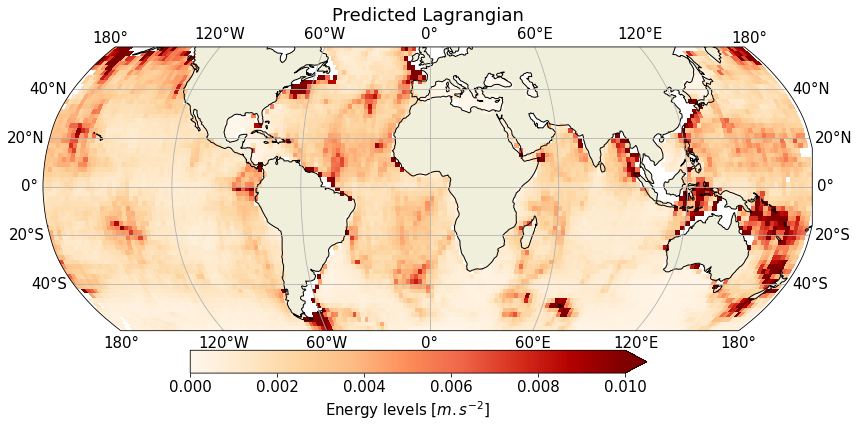

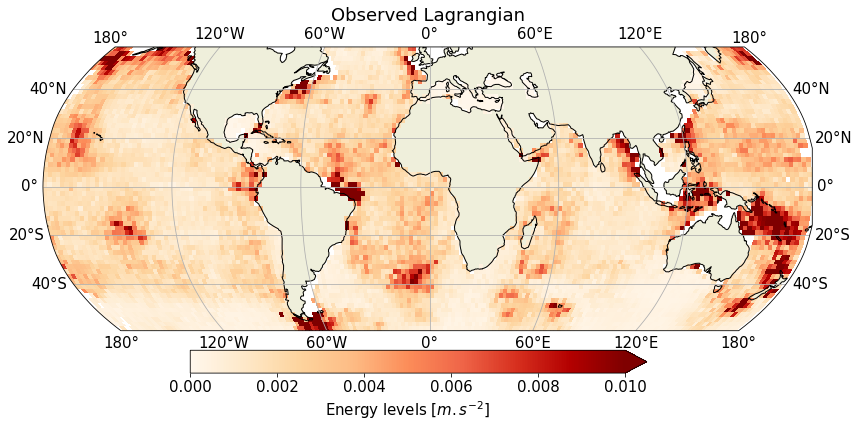

In [31]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsE.sel(param='U').parameters_SSV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Predicted Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(dsL.sel(param='U').parameters_SSV,colmap='OrRd',vlim=(0,0.01),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy levels [$m.s^{-2}$]'})
ax.set_title('Observed Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')




Text(0.5, 1.0, 'Lagrangian')

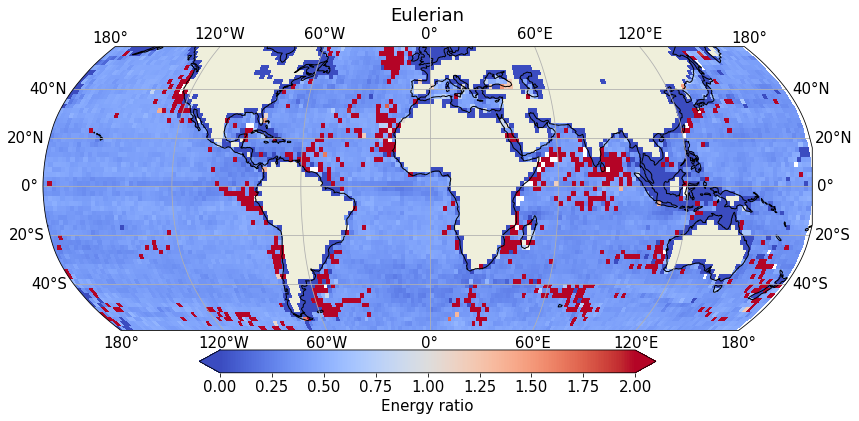

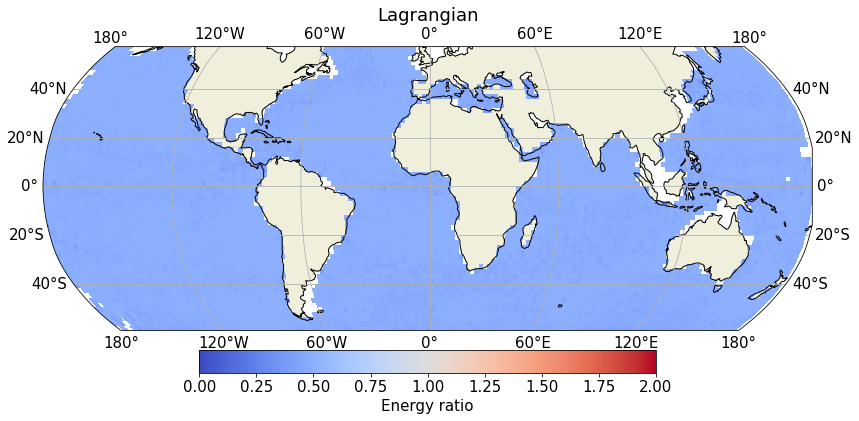

In [39]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV/Ve,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV/Vl,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')

Text(0.5, 1.0, 'Lagrangian')

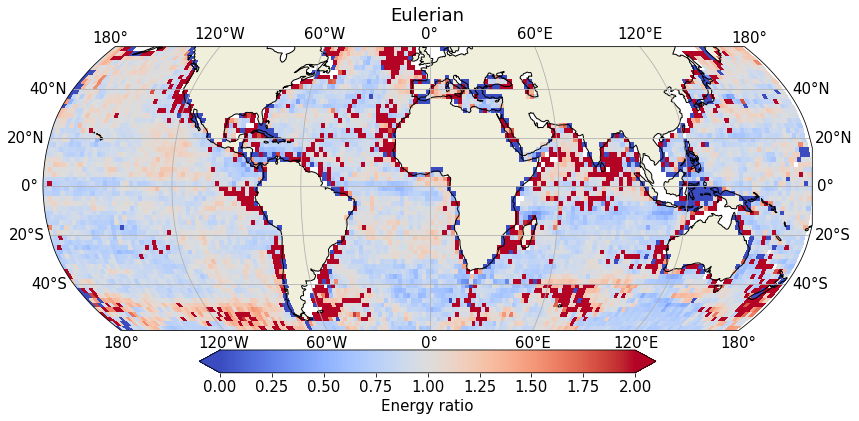

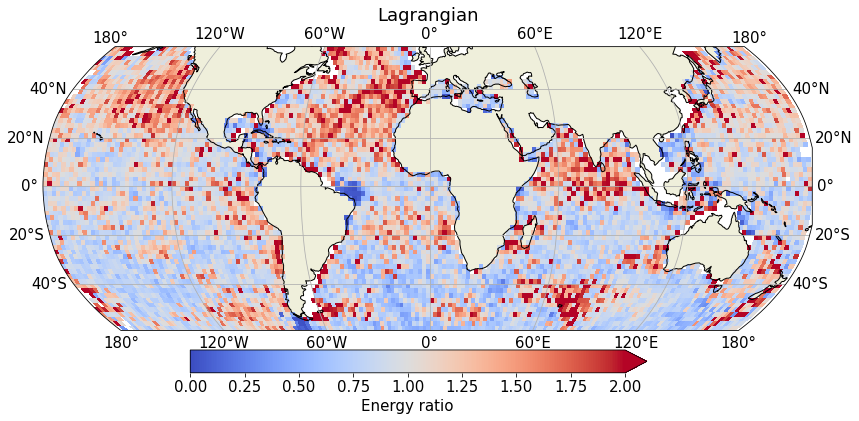

In [277]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV/dsE.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV/dsL.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(0,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy ratio'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

Text(0.5, 1.0, 'Lagrangian')

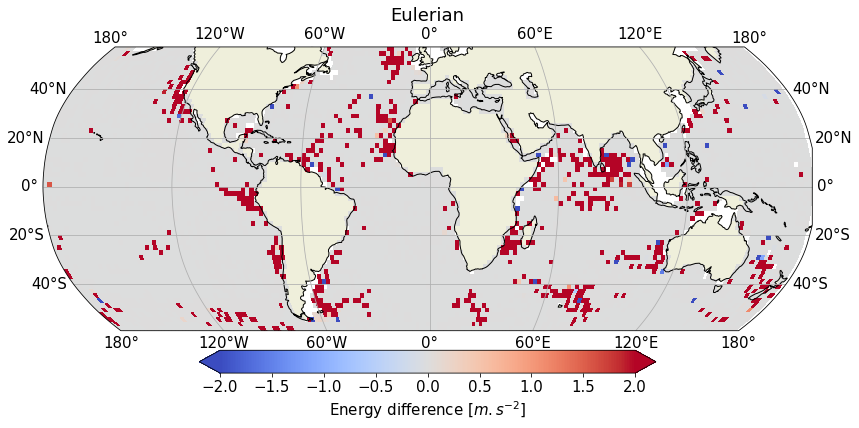

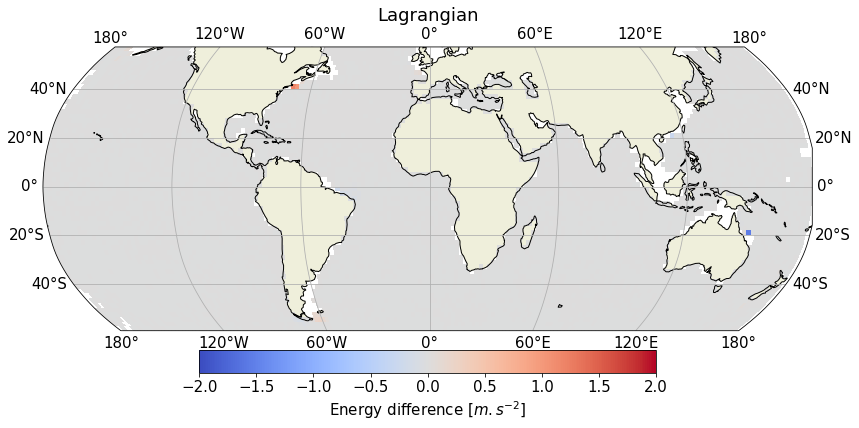

In [278]:
fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(EeV-dsE.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(-2,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy difference [$m.s^{-2}$]'})
ax.set_title('Eulerian')
#fig.savefig(fig_dir+'EKE_predicted.png')

fig = plt.figure(figsize=(15,6))
fig,ax = plot_maps(ElV-dsL.sel(param='U').parameters_SSV,colmap='coolwarm',vlim=(-2,2),lat='lat_bins',
                   **{'orientation':'horizontal','fraction':0.07,'pad':0.06,'label':r'Energy difference [$m.s^{-2}$]'})
ax.set_title('Lagrangian')
#fig.savefig(fig_dir+'EKE_predicted.png')

In [51]:
cluster.close()

distributed.client - ERROR - Failed to reconnect to scheduler after 30.00 seconds, closing client
